In [161]:
# Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [162]:
# To suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [163]:
#import the data
leads_original = pd.read_csv('Leads.csv')
# keep an original copy
leads_score = leads_original.copy()
leads_score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


In [164]:
#data information
leads_score.shape

(9240, 37)

In [165]:
leads_score.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.00,9240.00,9103.00,9240.00,9103.00,5022.00,5022.00
mean,617188.44,0.39,3.45,487.70,2.36,14.31,16.34
std,23406.00,0.49,4.85,548.02,2.16,1.39,1.81
min,579533.00,0.00,0.00,0.00,0.00,7.00,11.00
25%,596484.50,0.00,1.00,12.00,1.00,14.00,15.00
50%,615479.00,0.00,3.00,248.00,2.00,14.00,16.00
75%,637387.25,1.00,5.00,936.00,3.00,15.00,18.00
max,660737.00,1.00,251.00,2272.00,55.00,18.00,20.00


In [166]:
leads_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [167]:
# check for duplicates
leads_score.loc[leads_score.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


In [168]:
# check for duplicates in columns
print(sum(leads_score.duplicated(subset = 'Lead Number')))
print(sum(leads_score.duplicated(subset = 'Prospect ID')))

0
0


In [169]:
leads_score = leads_score.drop(['Lead Number','Prospect ID'],1)

In [170]:
# convert 'Select' values to NaN
leads_score = leads_score.replace('Select', np.nan)

In [171]:
#checking percentage for null values
round(100*(leads_score.isnull().sum()/len(leads_score.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                         26.63
Specialization                                  36.58
How did you hear about X Education              78.46
What is your current occupation                 29.11
What matters most to you in choosing a course   29.32
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

In [172]:
# To drop columns with more than 50% of missing values as it does not make sense to impute these many values

leads_score = leads_score.drop(leads_score.loc[:,list(round(100*(leads_score.isnull().sum()/len(leads_score.index)), 2)>52)].columns, 1)

In [173]:
# Function for percentage plots
def percent_plot(var):
    values = (leads_score[var].value_counts(normalize=True)*100)
    plt_p = values.plot.bar(color=sns.color_palette('deep'))
    plt_p.set(xlabel = var, ylabel = '% in dataset')

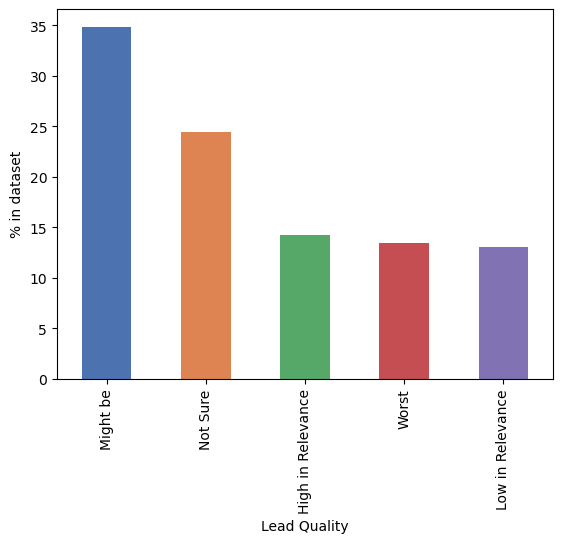

In [174]:
# For Lead Quality
percent_plot('Lead Quality')

In [175]:
#Null values in the 'Lead Quality' column can be imputed with the value 'Not Sure' as 
#we can assume that not filling in a column means the employee does not know or is not sure about the option.

In [176]:
leads_score['Lead Quality'] = leads_score['Lead Quality'].replace(np.nan, 'Not Sure')

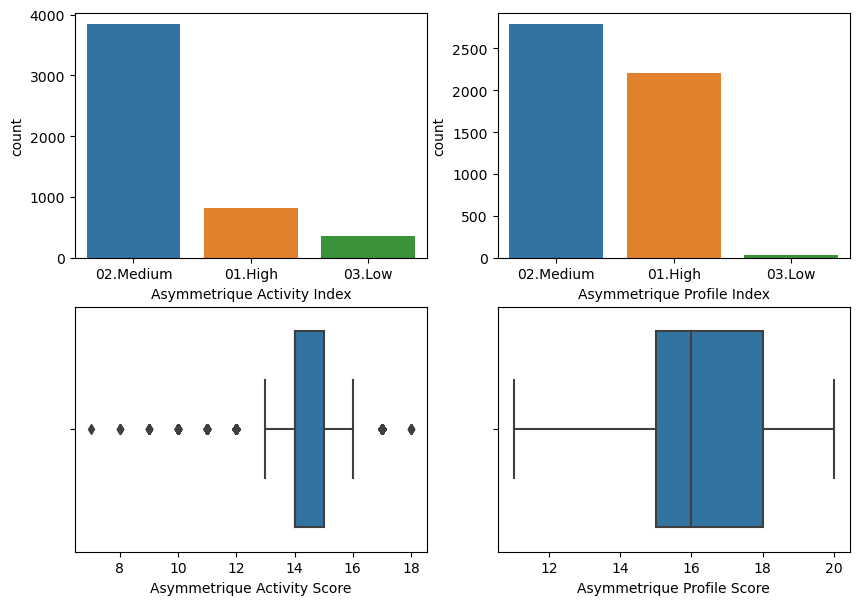

In [177]:
# For 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score'
asym_list = ['Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']
plt.figure(figsize=(10, 7))
for var in asym_list:
    plt.subplot(2,2,asym_list.index(var)+1)
    if 'Index' in var:
        sns.countplot(leads_score[var])
    else:
        sns.boxplot(leads_score[var])
plt.show()

In [178]:
#describe numerical variables
leads_score[asym_list].describe()

,Asymmetrique Activity Score,Asymmetrique Profile Score
count,5022.00,5022.00
mean,14.31,16.34
std,1.39,1.81
min,7.00,11.00
25%,14.00,15.00
50%,14.00,16.00
75%,15.00,18.00
max,18.00,20.00


In [179]:
#These four variables have more than 45% missing values and it can be seen from the plots 
#that there is a lot of variation in them. So, it's not a good idea to impute 45% of the data. 
#Even if we impute with mean/median for numerical variables, these values will not have any significant importance in the model.
#We'll have to drop these variables.

In [180]:
leads_score = leads_score.drop(asym_list,1)

In [181]:
# To get percentage of null values in each column
round(100*(leads_score.isnull().sum()/len(leads_score.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                         26.63
Specialization                                  36.58
What is your current occupation                 29.11
What matters most to you in choosing a course   29.32
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

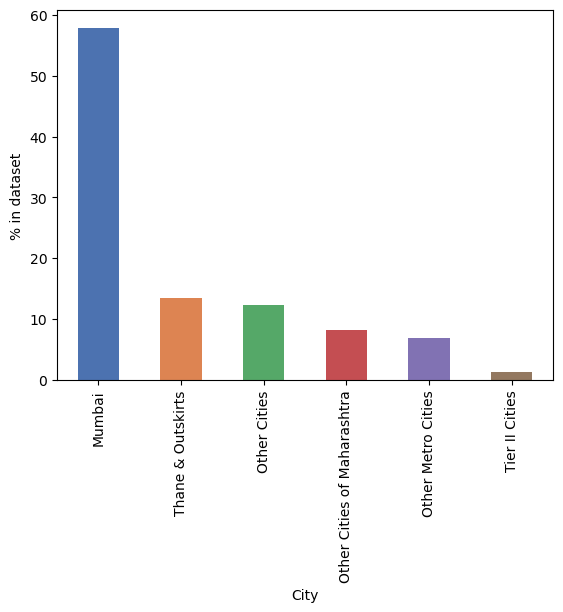

In [182]:
# For 'City'
percent_plot('City')

In [183]:
#Around 60% of the City values are Mumbai. We can impute 'Mumbai' in the missing values.
leads_score['City'] = leads_score['City'].replace(np.nan, 'Mumbai')

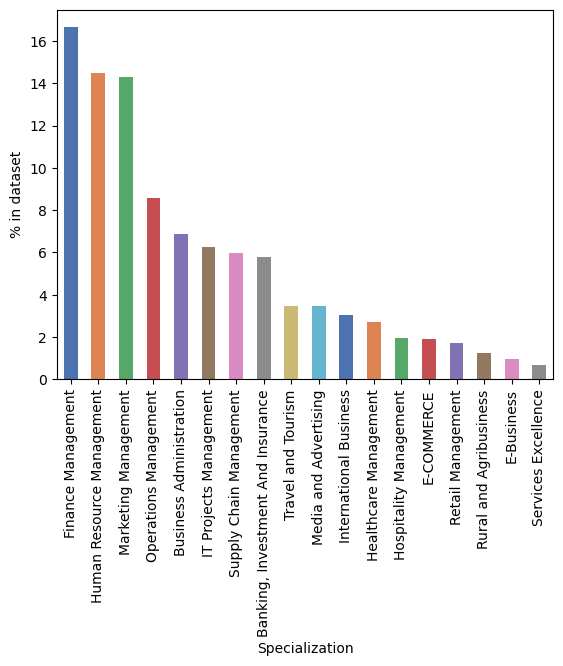

In [184]:
# For 'Specialization'
percent_plot('Specialization')

In [185]:
#There are a lot of different specializations and it's not accurate to directly impute with the mean. 
#We can create a new column for that.
leads_score['Specialization'] = leads_score['Specialization'].replace(np.nan, 'Others')

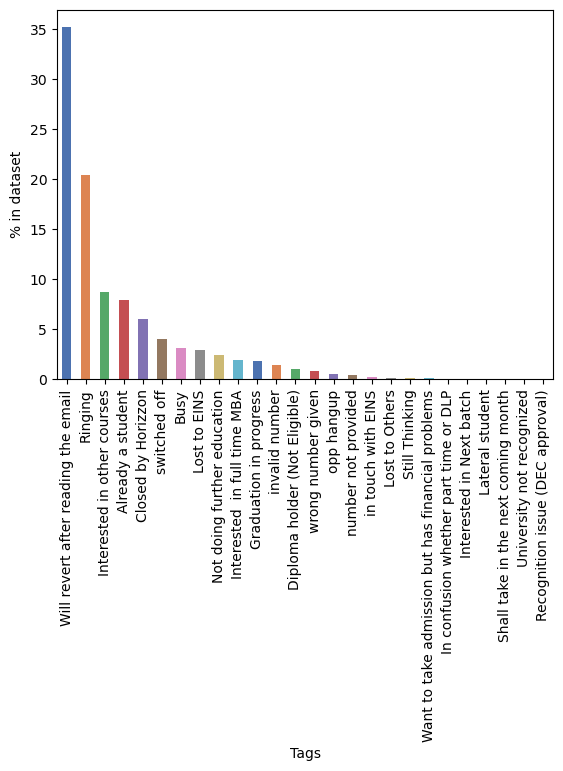

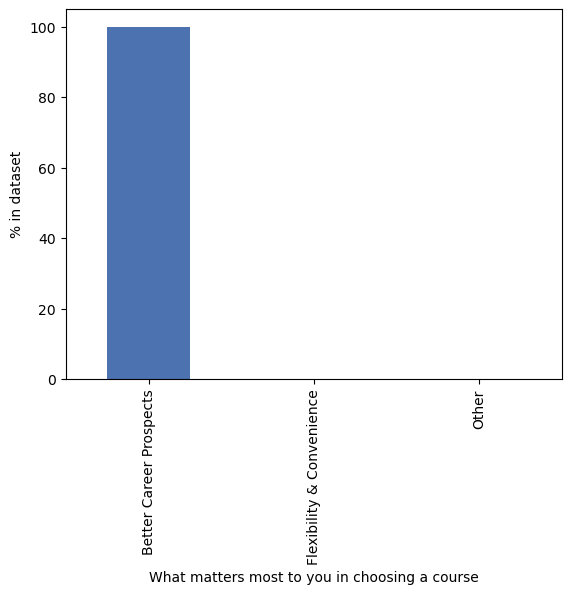

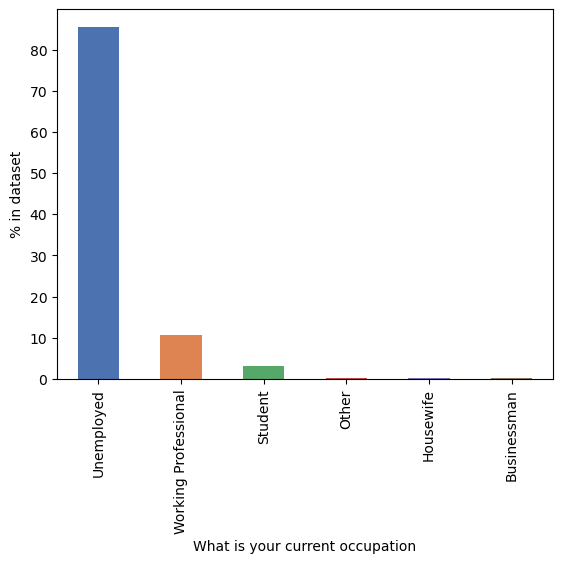

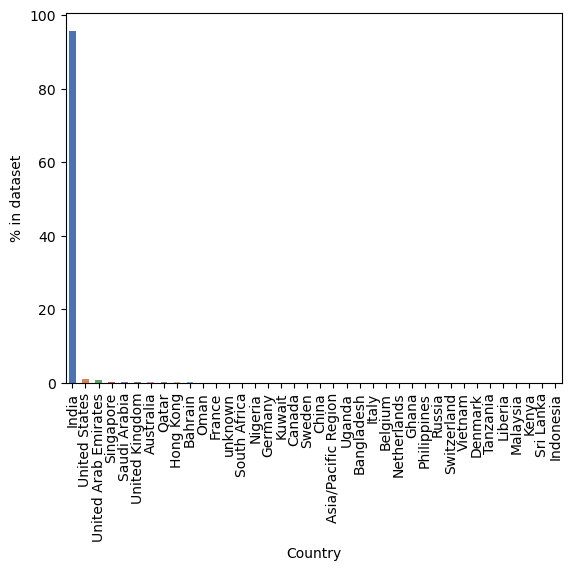

In [186]:
## For 'Tags', 'What matters most to you in choosing a course', 'What is your current occupation' and 'Country'
var_list = ['Tags', 'What matters most to you in choosing a course', 'What is your current occupation', 'Country']

for var in var_list:
    percent_plot(var)
    plt.show()

In [187]:
#In all these categorical variables, one value is clearly more frequent than all others. So it makes sense to impute with the most frequent values.

In [188]:
# To impute with the most frequent value
for var in var_list:
    top_frequent = leads_score[var].describe()['top']
    leads_score[var] = leads_score[var].replace(np.nan, top_frequent)

In [189]:
# To get percentage of null values in each column
round(100*(leads_score.isnull().sum()/len(df_leads.index)), 2)

NameError: name 'df_leads' is not defined

In [ ]:
# For 'TotalVisits' and 'Page Views Per Visit'
visit_list = ['TotalVisits', 'Page Views Per Visit']
plt.figure(figsize=(15, 5))
for var in visit_list:
    plt.subplot(1,2,visit_list.index(var)+1)
    sns.boxplot(df_leads[var])
plt.show()

leads_score[visit_list].describe()

In [ ]:
# For 'Lead Source' and 'Last Activity'
var_list = ['Lead Source', 'Last Activity']

for var in var_list:
    percent_plot(var)
    plt.show()

In [190]:
#In these categorical variables, imputing with the most frequent value is not accurate as the next most frequent value has similar frequency. Also, as these variables have very little missing values, it is better to drop the rows containing these missing values. 
#Hence, we'll drop the rows containing any missing values for above four variables.

In [191]:
# To drop the rows containing missing values
leads_score.dropna(inplace = True)

In [192]:
# To get percentage of null values in each column
round(100*(leads_score.isnull().sum()/len(leads_score.index)), 2)

Lead Origin                                     0.00
Lead Source                                     0.00
Do Not Email                                    0.00
Do Not Call                                     0.00
Converted                                       0.00
TotalVisits                                     0.00
Total Time Spent on Website                     0.00
Page Views Per Visit                            0.00
Last Activity                                   0.00
Country                                         0.00
Specialization                                  0.00
What is your current occupation                 0.00
What matters most to you in choosing a course   0.00
Search                                          0.00
Magazine                                        0.00
Newspaper Article                               0.00
X Education Forums                              0.00
Newspaper                                       0.00
Digital Advertisement                         

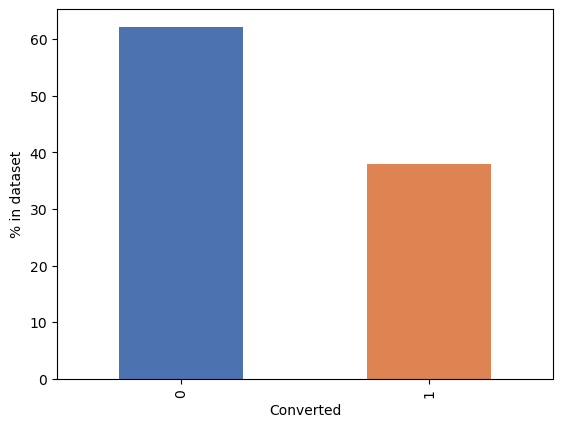

In [193]:
#DATA VISUALIZATION
# For the target variable 'Converted'
percent_plot('Converted')

In [194]:
(sum(leads_score['Converted'])/len(leads_score['Converted'].index))*100

37.85541106458012

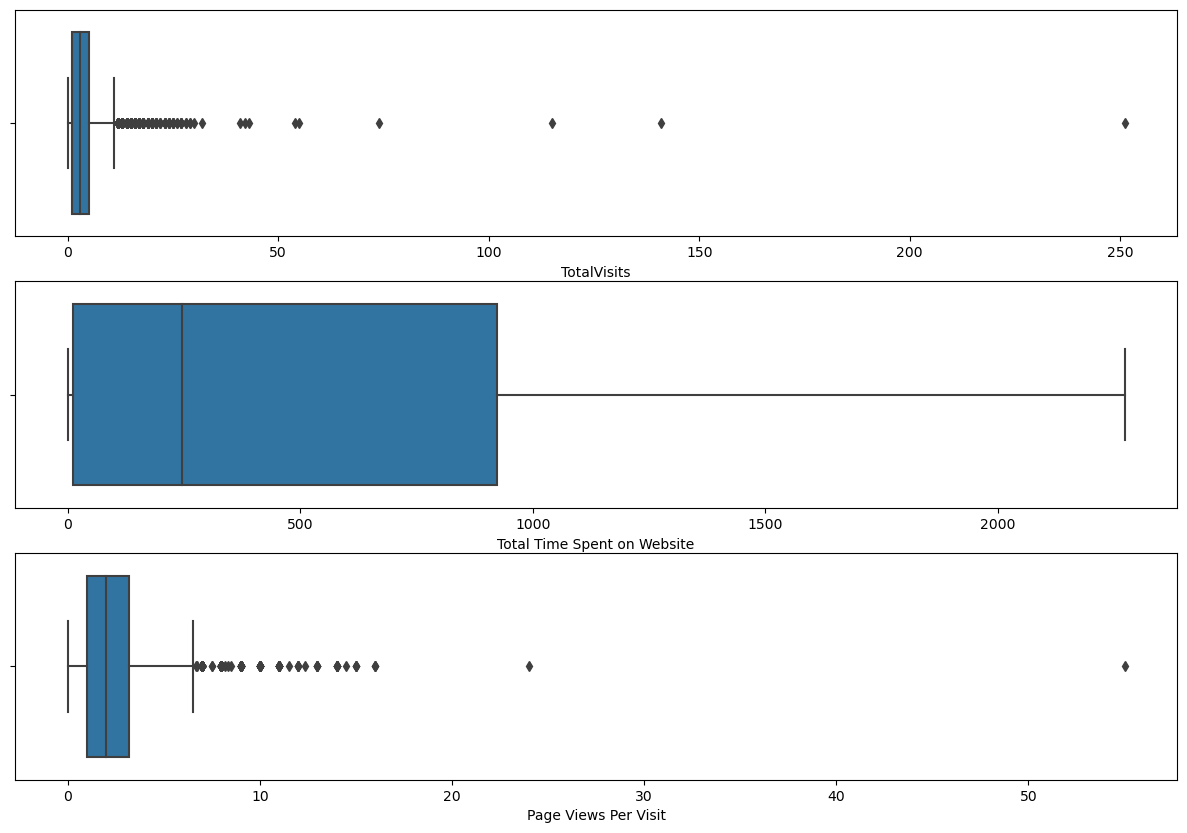

In [195]:
#visualization of numerical variables and outliers treatment
# Boxplots
num_var = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
plt.figure(figsize=(15, 10))
for var in num_var:
    plt.subplot(3,1,num_var.index(var)+1)
    sns.boxplot(leads_score[var])
plt.show()

In [196]:
leads_score[num_var].describe([0.05,.25, .5, .75, .90, .95])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.00,9074.00,9074.00
mean,3.46,482.89,2.37
std,4.86,545.26,2.16
min,0.00,0.00,0.00
5%,0.00,0.00,0.00
25%,1.00,11.00,1.00
50%,3.00,246.00,2.00
75%,5.00,922.75,3.20
90%,7.00,1373.00,5.00
95%,10.00,1557.00,6.00


In [197]:
#From the boxplots, we can see that there are outliers present in the variables.

#For 'TotalVisits', the 95% quantile is 10 whereas the maximum value is 251. Hence, we should cap these outliers at 95% value.
#There are no significant outliers in 'Total Time Spent on Website'
#For 'Page Views Per Visit', similar to 'TotalVisits', we should cap outliers at 95% value.

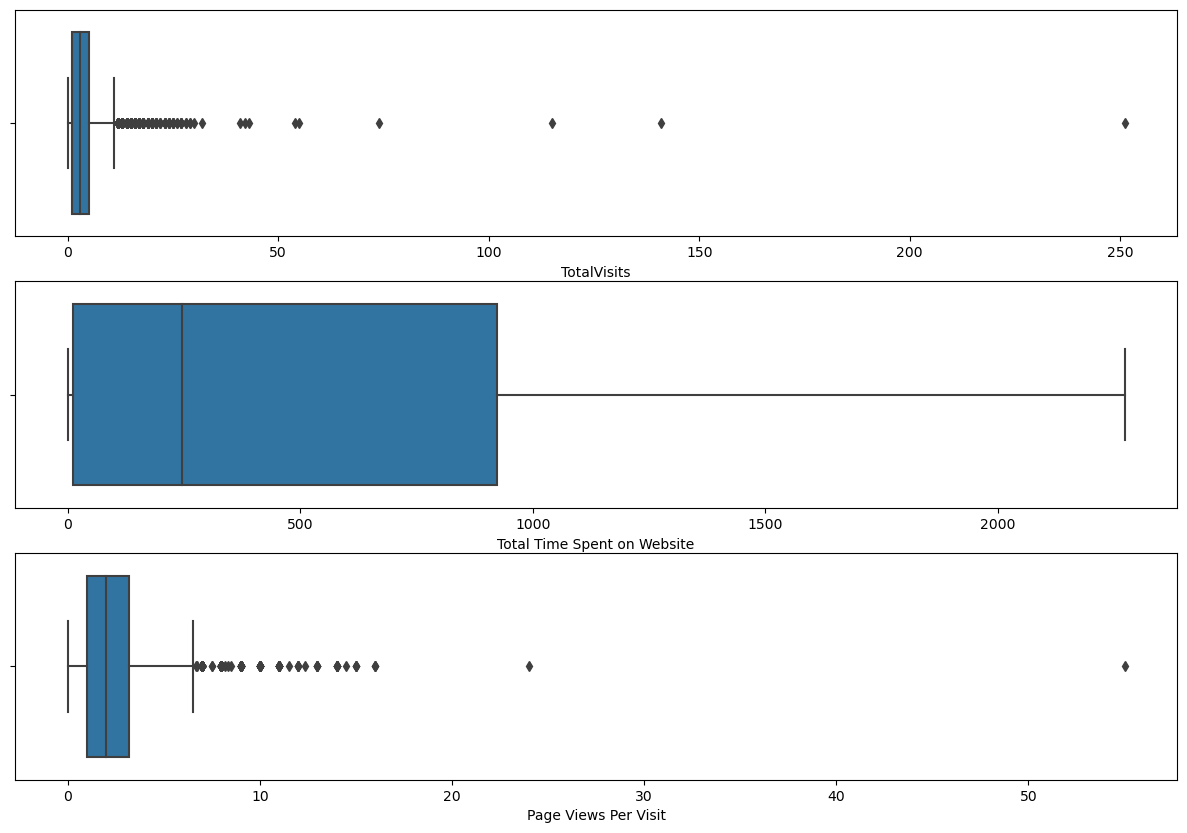

In [198]:
# Plot Boxplots to verify 
plt.figure(figsize=(15, 10))
for var in num_var:
    plt.subplot(3,1,num_var.index(var)+1)
    sns.boxplot(leads_score[var])
plt.show()

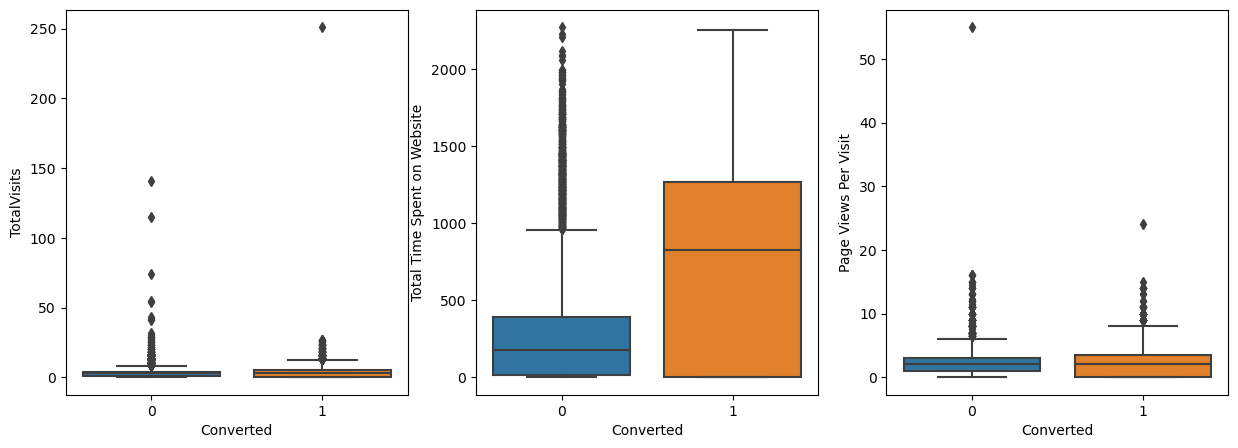

In [199]:
#plot numerical variables against target variable to analyse relations
plt.figure(figsize=(15, 5))
for var in num_var:
    plt.subplot(1,3,num_var.index(var)+1)
    sns.boxplot(y = var , x = 'Converted', data = leads_score)
plt.show()

In [200]:
#Observations:

#'TotalVisits' has same median values for both outputs of leads. No conclusion can be drwan from this.
#People spending more time on the website are more likely to be converted. This is also aligned with our general knowledge.
#'Page Views Per Visit' also has same median values for both outputs of leads. Hence, inconclusive.

In [201]:
# visualize Categorical variables
cat_var = list(leads_score.columns[leads_score.dtypes == 'object'])
cat_var

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Tags',
 'Lead Quality',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'City',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [202]:
# Functions to plot countplots for categorical variables with target variable

# For single plot
def plot_cat_var(var):
    plt.figure(figsize=(20, 7))
    sns.countplot(x = var, hue = "Converted", data = leads_score)
    plt.xticks(rotation = 90)
    plt.show()

# For multiple plots    
def plot_cat_vars(lst):
    l = int(len(lst)/2)
    plt.figure(figsize=(20, l*7))
    for var in lst:
        plt.subplot(l,2,lst.index(var)+1)
        sns.countplot(x = var, hue = "Converted", data = leads_score)
        plt.xticks(rotation = 90)
    plt.show()

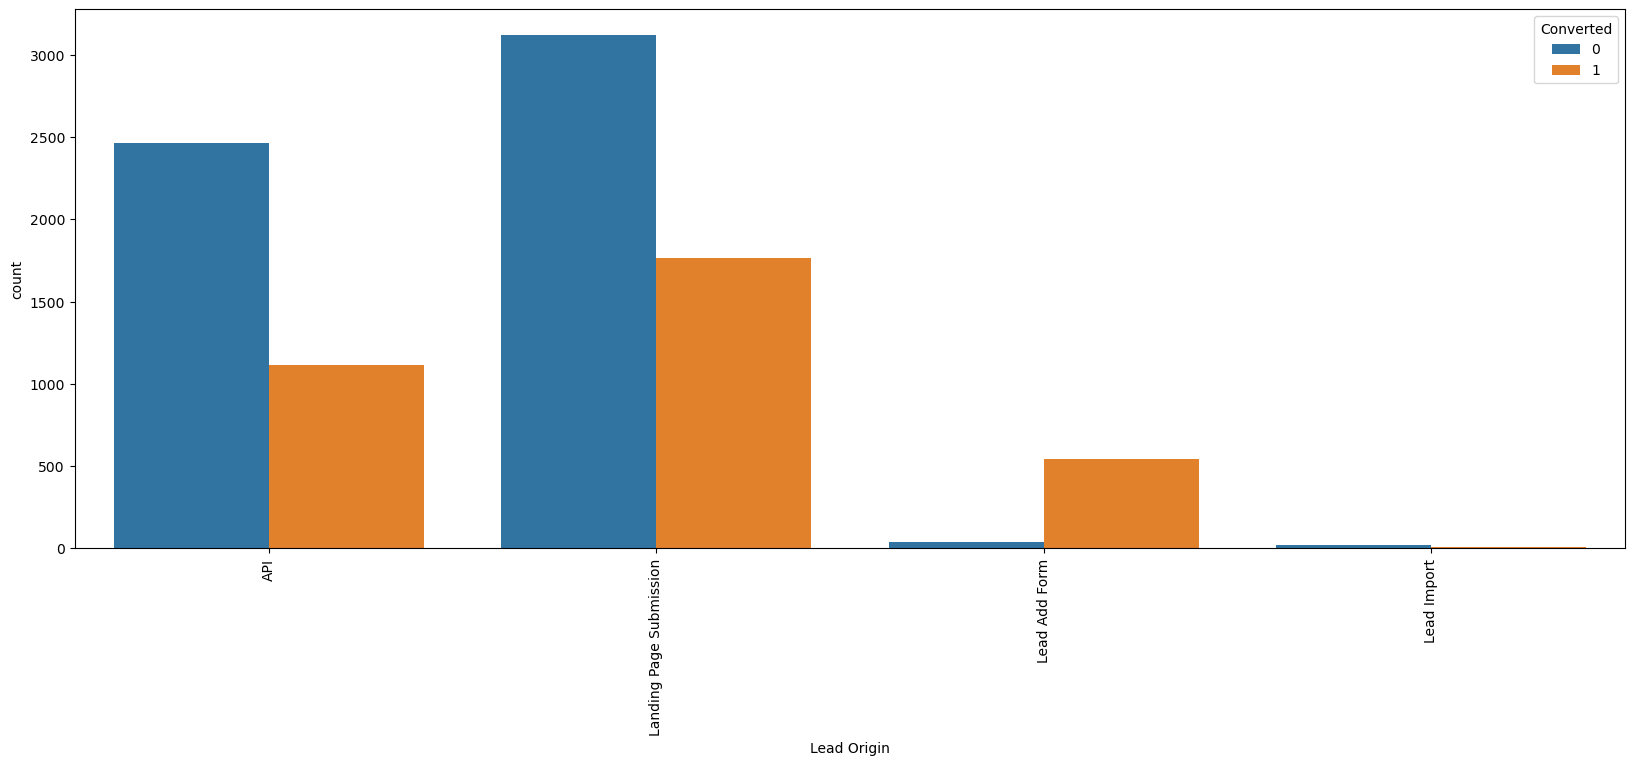

In [203]:
plot_cat_var(cat_var[0])

In [204]:
#Observations for Lead Origin :
#'API' and 'Landing Page Submission' generate the most leads but have less conversion rates of around 30%. Whereas, 
#'Lead Add Form' generates less leads but conversion rate is great.
#We should try to increase conversion rate for 'API' and 'Landing Page Submission', and increase leads generation using 'Lead Add Form'. 'Lead Import' does not seem very significant.

In [205]:
#Observations for Lead Origin :
#'API' and 'Landing Page Submission' generate the most leads but have less conversion rates of around 30%. Whereas, 'Lead Add Form' generates less leads but conversion rate is great. We should try to increase conversion rate for 'API' and 'Landing Page Submission', and increase leads generation using 'Lead Add Form'. 'Lead Import' does not seem very significant.

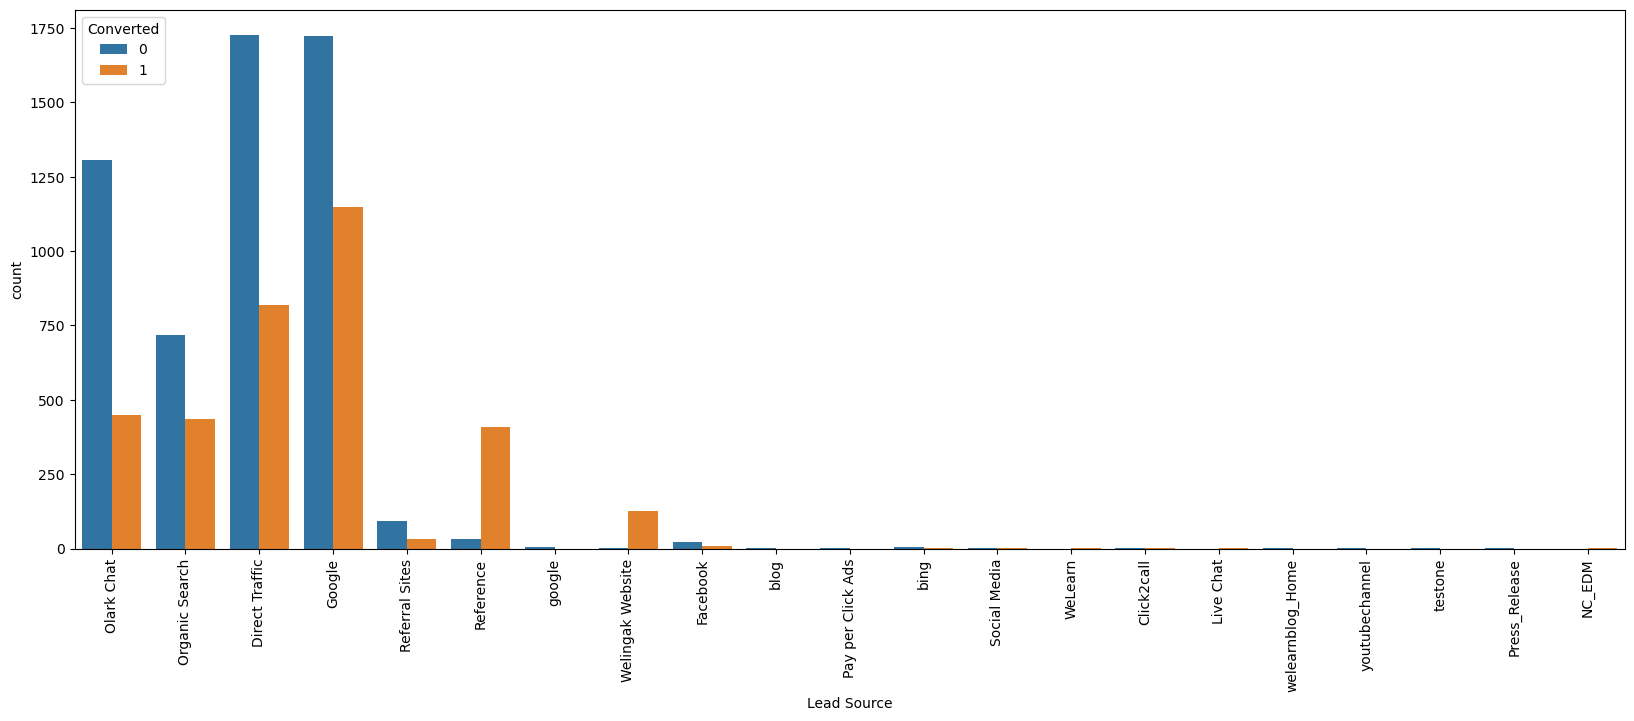

In [206]:
plot_cat_var(cat_var[1])

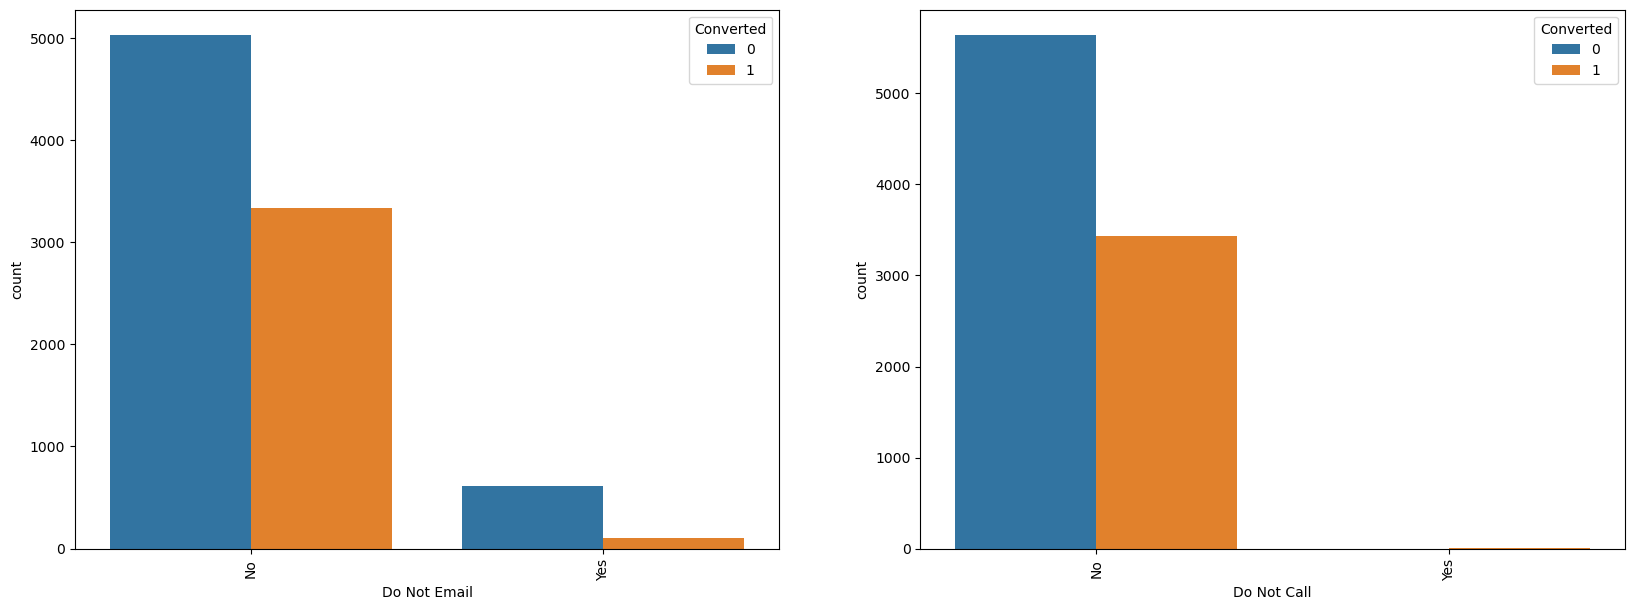

In [207]:
plot_cat_vars([cat_var[2],cat_var[3]])

In [208]:
#Observations for Do Not Email and Do Not Call :
#As one can expect, most of the responses are 'No' for both the variables which generated most of the leads

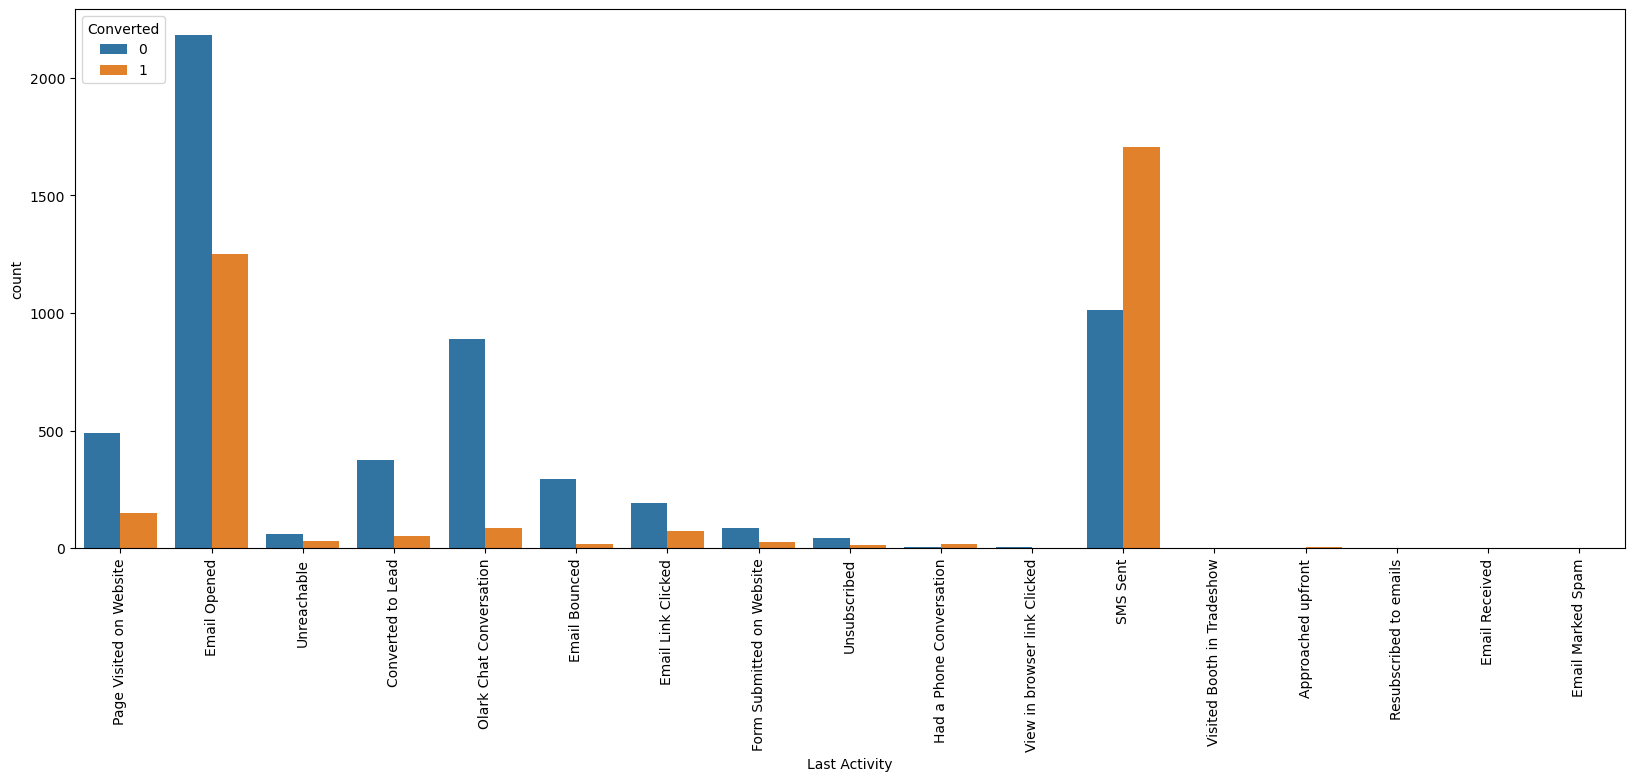

In [209]:
plot_cat_var(cat_var[4])

In [210]:
#Observations for Last Activity :

#Highest number of lead are generated where the last activity is 'Email Opened' while maximum conversion rate is for the activity of 'SMS Sent'. Its conversion rate is significantly high.
#Categories after the 'SMS Sent' have almost negligible effect. We can aggregate them all in one single category.

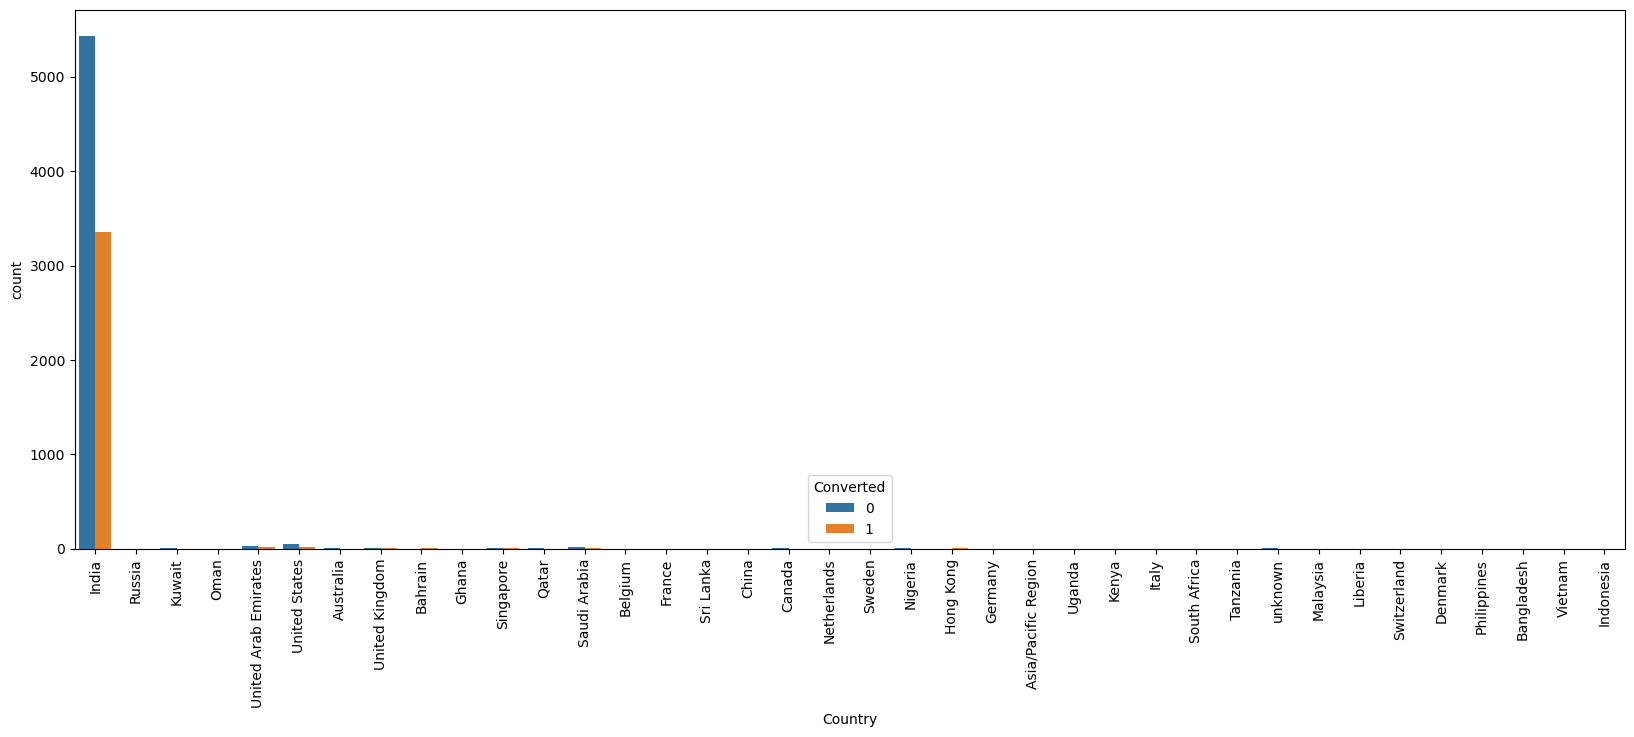

In [211]:
plot_cat_var(cat_var[5])

In [212]:
#Observations for Country :
#Most of the responses are for India. Others are not significant.

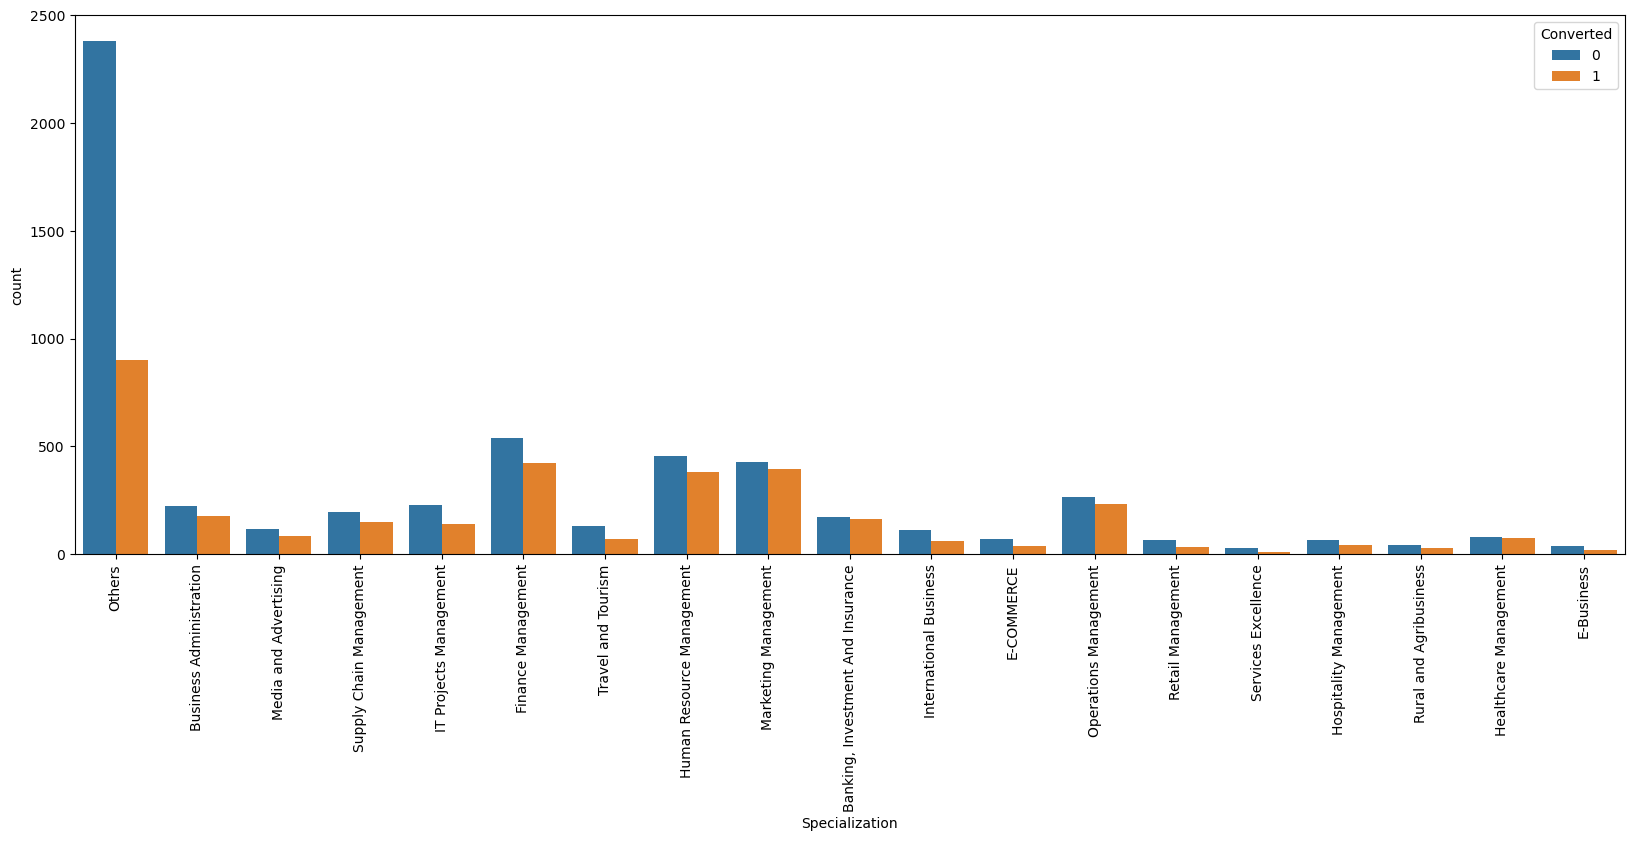

In [213]:
plot_cat_var(cat_var[6])

In [214]:
#Observations for Specialization :
#Conversion rates are mostly similar across different specializations.

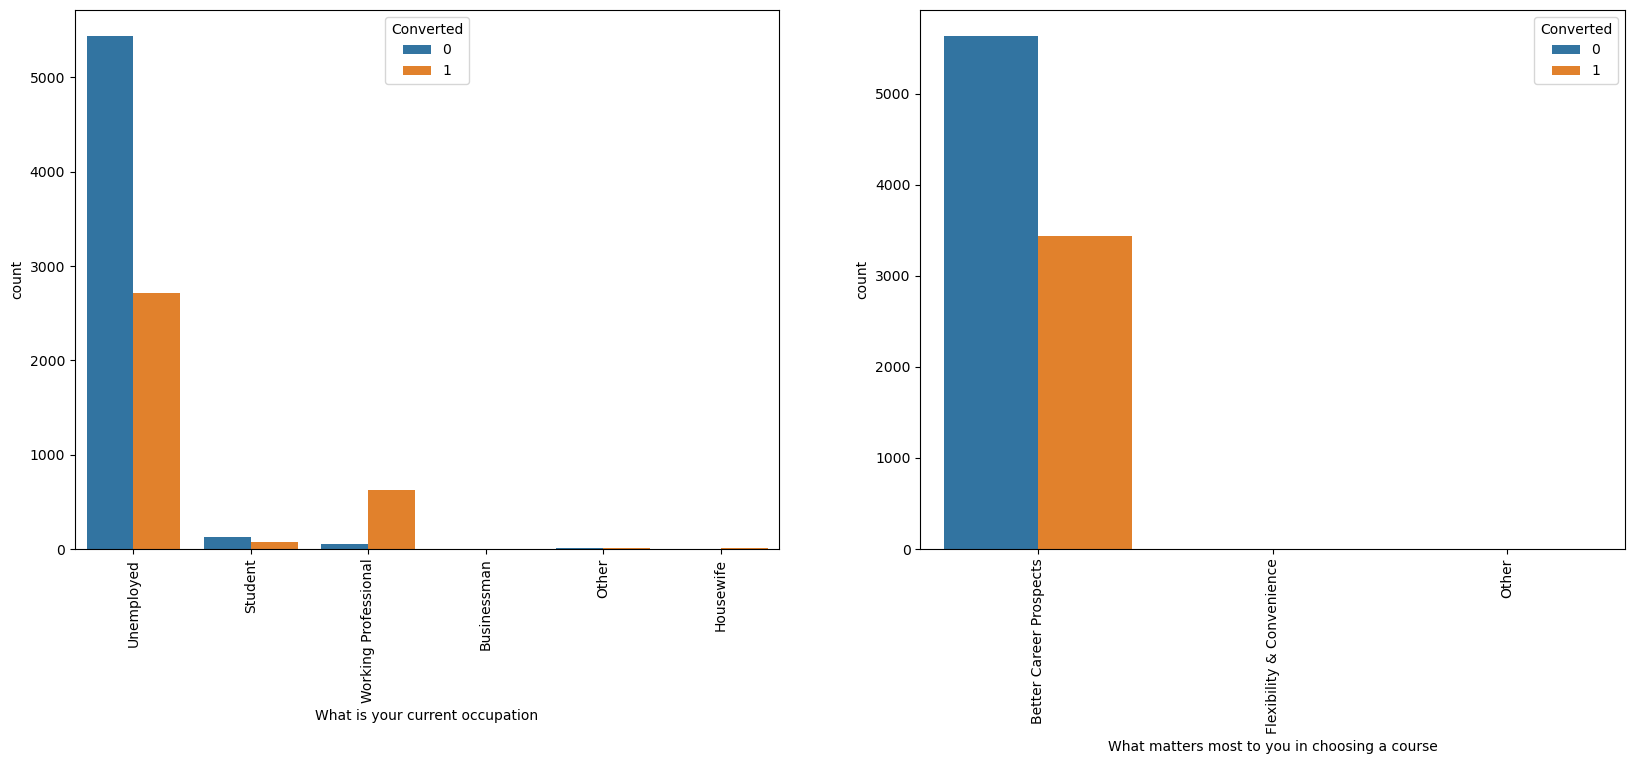

In [215]:
plot_cat_vars([cat_var[7],cat_var[8]])

In [216]:
#Observations for What is your current occupation and What matters most to you in choosing a course :

#The highest conversion rate is for 'Working Professional'. 
#High number of leads are generated for 'Unemployed' but conversion rate is low.
#Variable 'What matters most to you in choosing a course' has only one category with significant count.

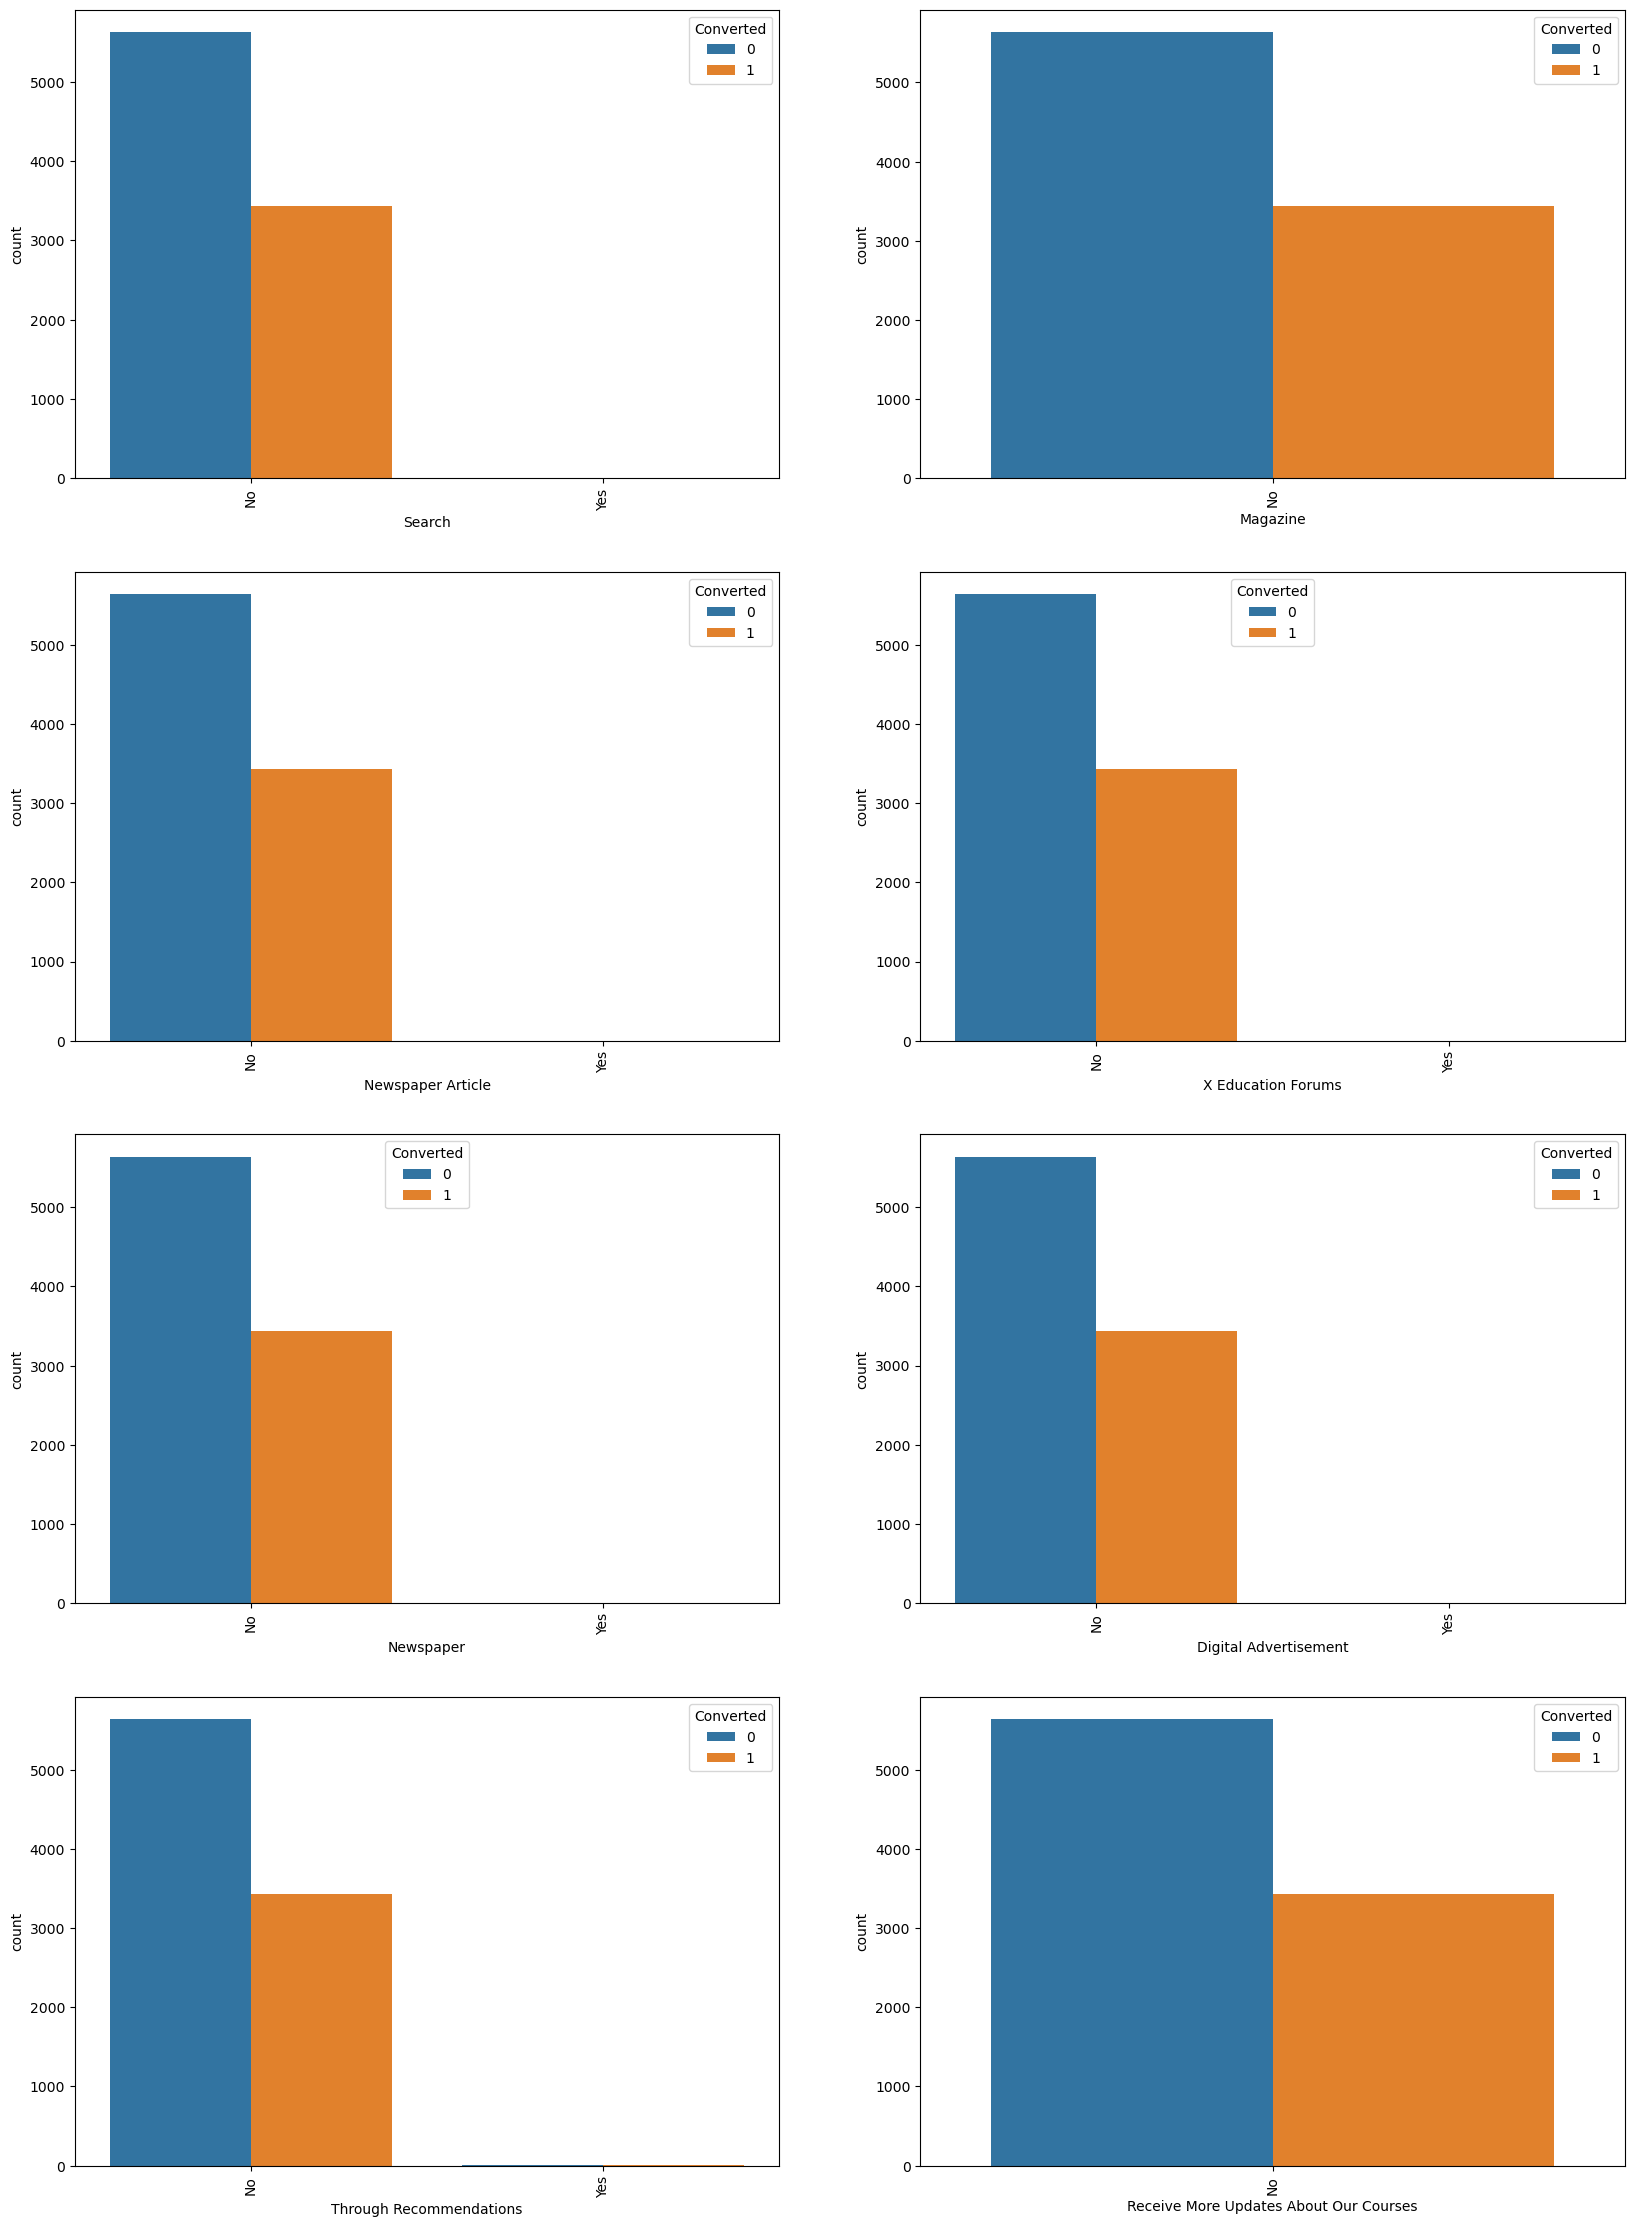

In [217]:
plot_cat_vars(cat_var[9:17])

In [218]:
#Observations for Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, and Receive More Updates About Our Courses:
#As all the above variables have most of the values as no, nothing significant can be inferred from these plots

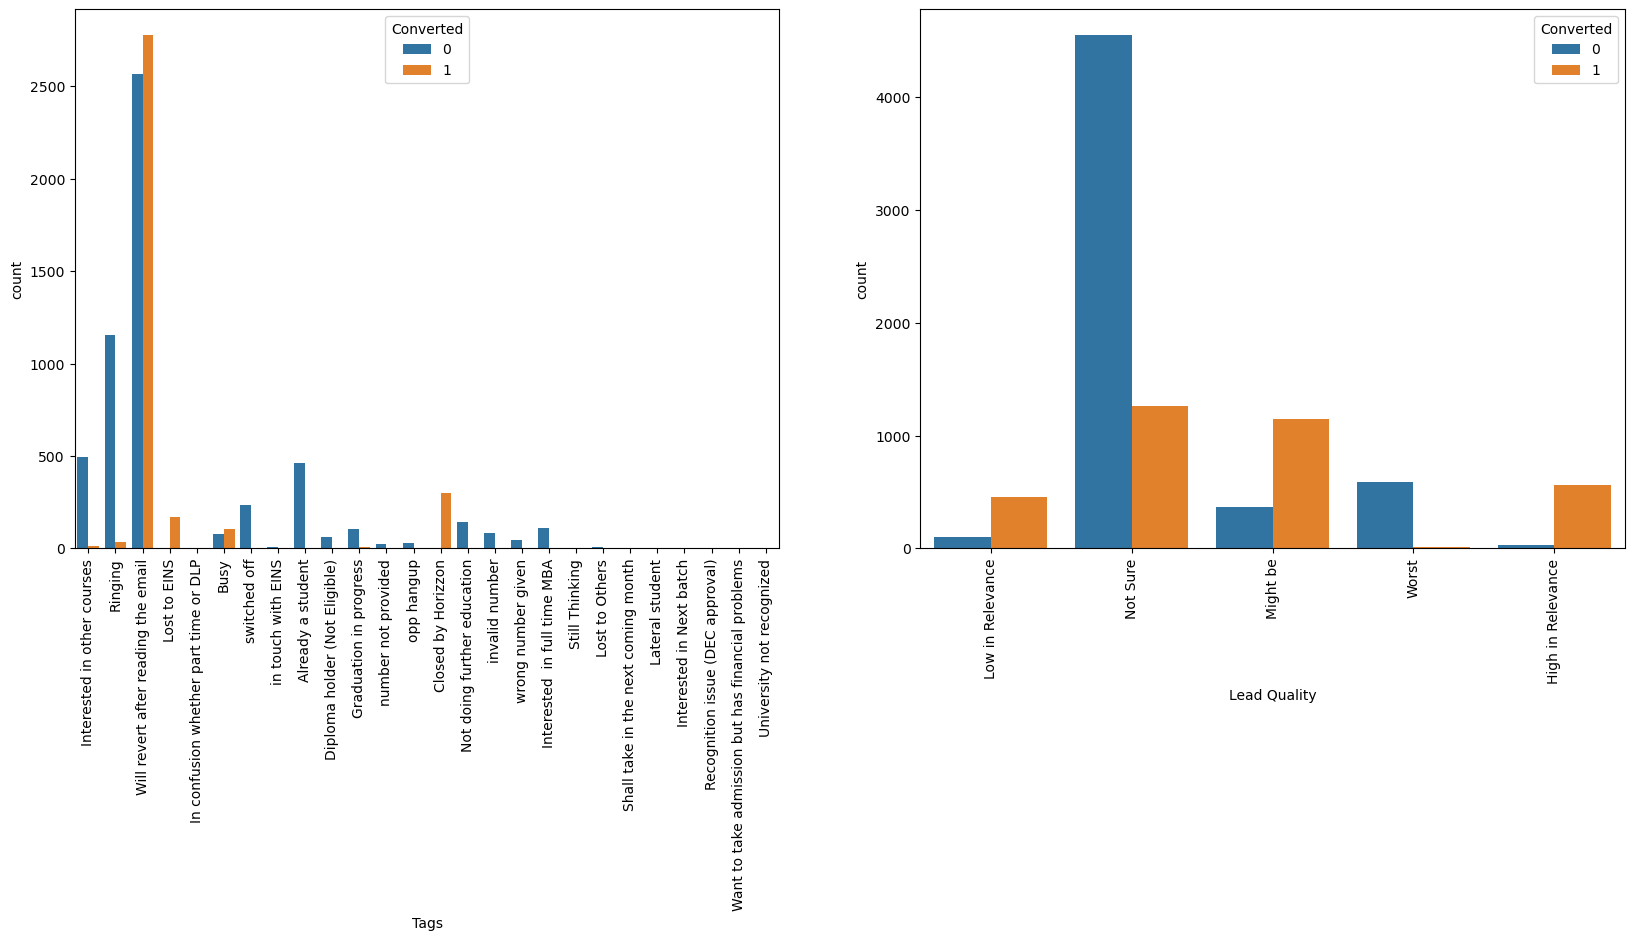

In [219]:
plot_cat_vars([cat_var[17],cat_var[18]])

In [220]:
#Observations for Tags and Lead Quality:

#In Tags, categories after 'Interested in full time MBA' have very few leads generated, so we can combine them into one single category.
#Most leads generated and the highest conversion rate are both attributed to the tag 'Will revert after reading the email'.
#In Lead quality, as expected, 'Might be' as the highest conversion rate while 'Worst' has the lowest.

In [221]:
categories = leads_score['Tags'].unique()
categories

array(['Interested in other courses', 'Ringing',
       'Will revert after reading the email', 'Lost to EINS',
       'In confusion whether part time or DLP', 'Busy', 'switched off',
       'in touch with EINS', 'Already a student',
       'Diploma holder (Not Eligible)', 'Graduation in progress',
       'number not provided', 'opp hangup', 'Closed by Horizzon',
       'Not doing further education', 'invalid number',
       'wrong number given', 'Interested  in full time MBA',
       'Still Thinking', 'Lost to Others',
       'Shall take in the next coming month', 'Lateral student',
       'Interested in Next batch', 'Recognition issue (DEC approval)',
       'Want to take admission but has financial problems',
       'University not recognized'], dtype=object)

In [222]:
# To reduce categories
leads_score['Tags'] = leads_score['Tags'].replace(categories[-8:], 'Others')

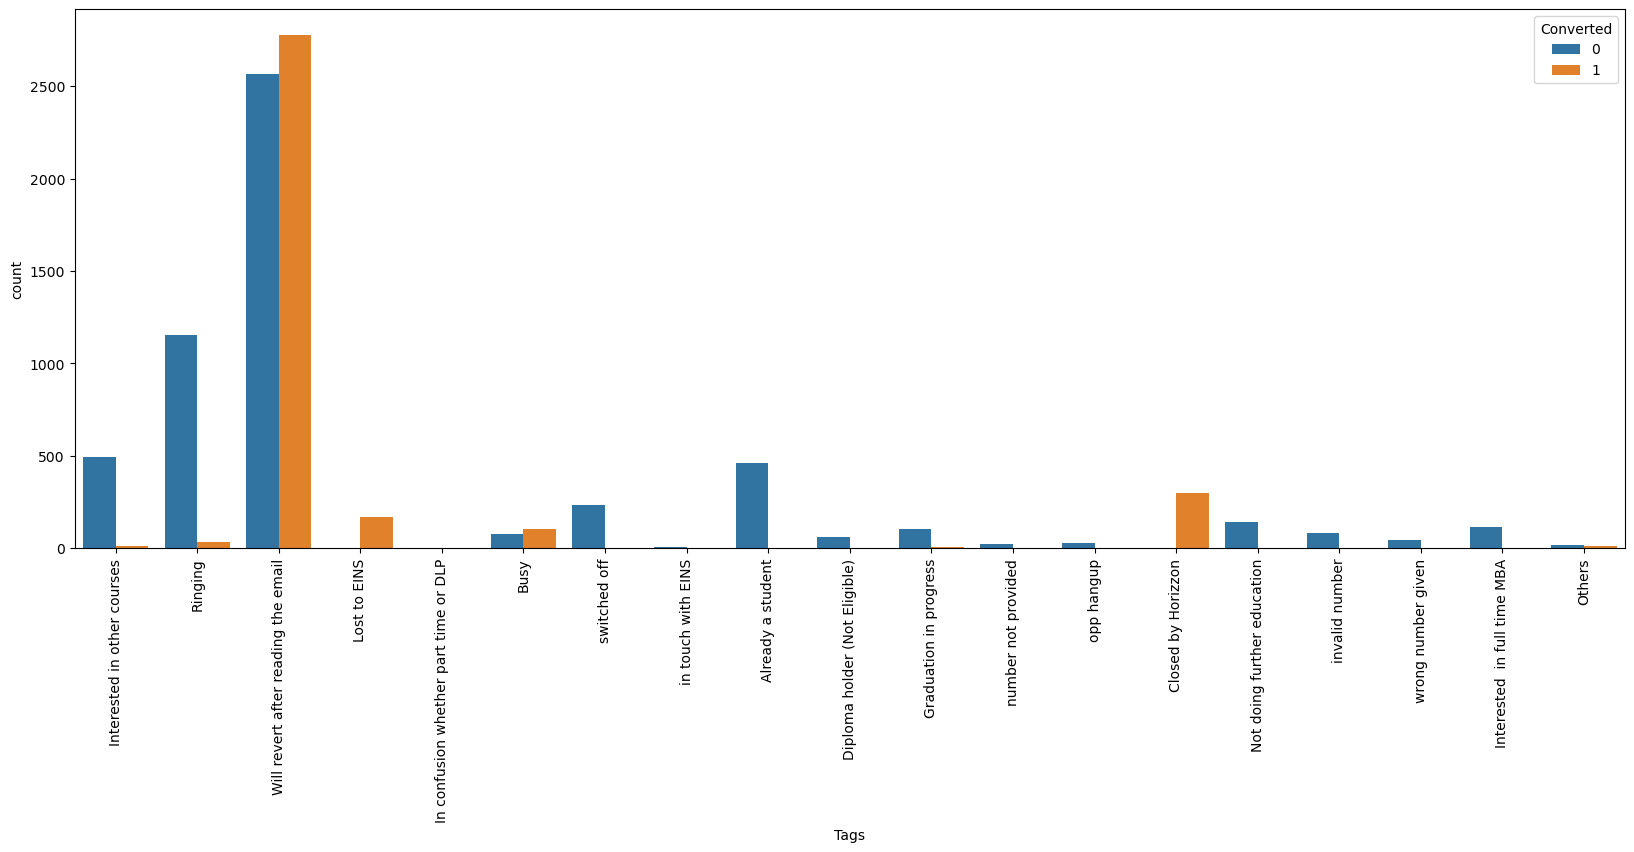

In [223]:
# To plot new categories
plot_cat_var(cat_var[17])

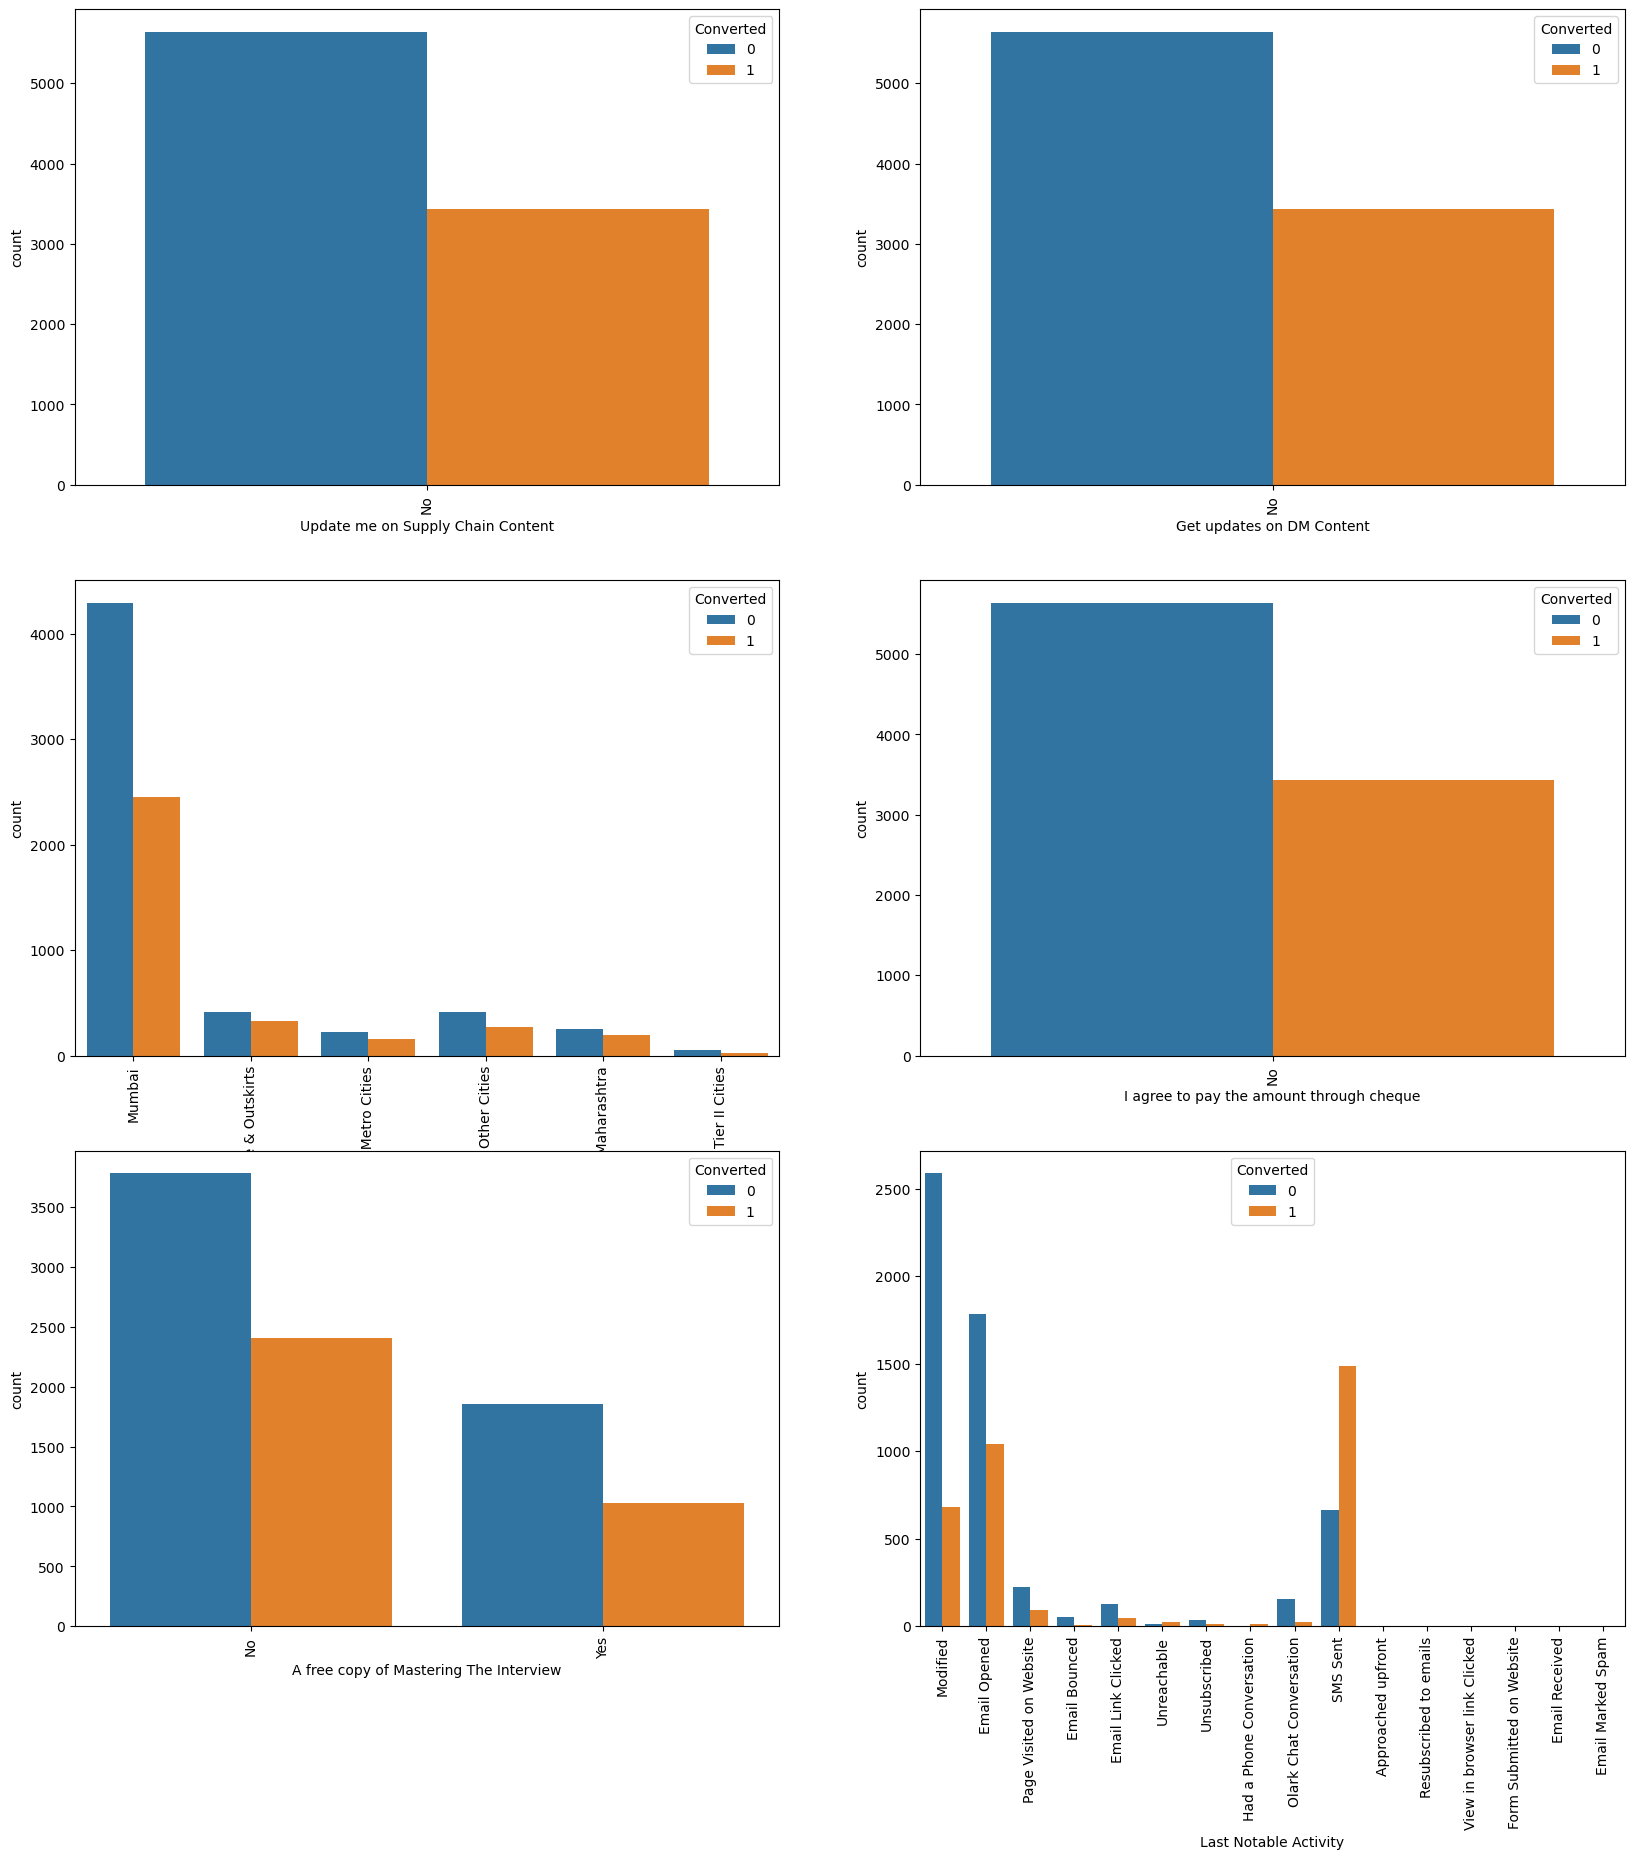

In [224]:
plot_cat_vars(cat_var[19:25])

In [225]:
#Observations for Update me on Supply Chain Content, Get updates on DM Content, City, I agree to pay the amount through cheque, A free copy of Mastering The Interview, and Last Notable Activity :

#Most of these variables are insignificant in analysis as many of them only have one significant category 'NO'.
#In City, most of the leads are generated for 'Mumbai'.
#In 'A free copy of Mastering The Interview', both categories have similar conversion rates.
#In 'Last Notable Activity', we can combine categories after 'SMS Sent' similar to the variable 'Last Activity'. It has most generated leads for the category 'Modified' while most conversion rate for 'SMS Sent' activity.

In [226]:
categories = leads_score['Last Notable Activity'].unique()
categories

array(['Modified', 'Email Opened', 'Page Visited on Website',
       'Email Bounced', 'Email Link Clicked', 'Unreachable',
       'Unsubscribed', 'Had a Phone Conversation',
       'Olark Chat Conversation', 'SMS Sent', 'Approached upfront',
       'Resubscribed to emails', 'View in browser link Clicked',
       'Form Submitted on Website', 'Email Received', 'Email Marked Spam'],
      dtype=object)

In [227]:
# To reduce categories
leads_score['Last Notable Activity'] = leads_score['Last Notable Activity'].replace(categories[-6:], 'Others')

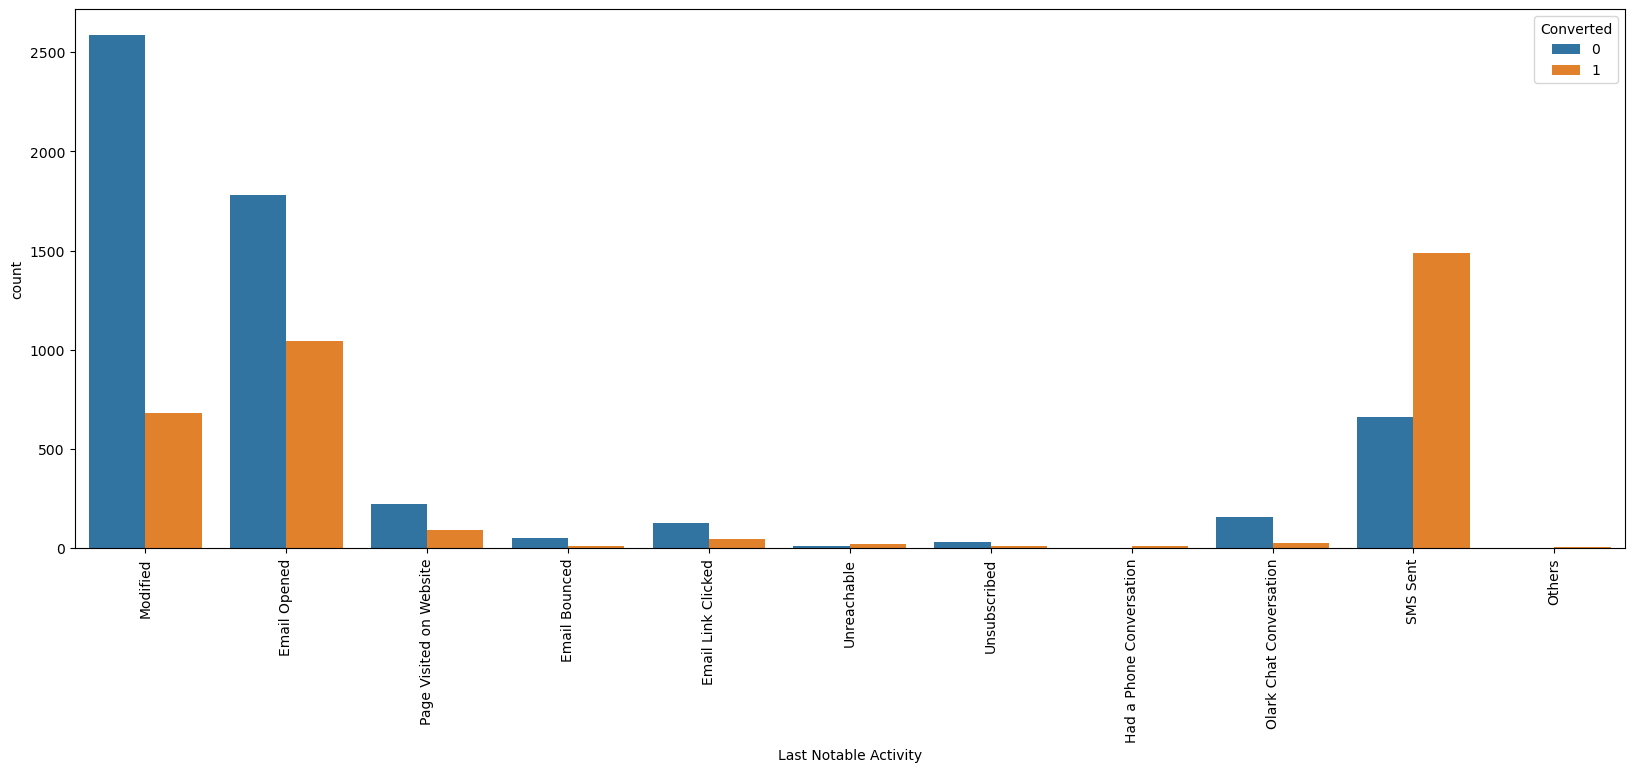

In [228]:
# To plot new categories
plot_cat_var(cat_var[24])

In [229]:
leads_score = leads_score.drop(['Do Not Call','Country','What matters most to you in choosing a course','Search','Magazine','Newspaper Article',
                          'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations',
                          'Receive More Updates About Our Courses','Update me on Supply Chain Content',
                          'Get updates on DM Content','I agree to pay the amount through cheque',
                          'A free copy of Mastering The Interview'],1)

In [230]:
# Final dataframe
leads_score.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,API,Olark Chat,No,0,0.00,0,0.00,Page Visited on Website,Others,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,API,Organic Search,No,0,5.00,674,2.50,Email Opened,Others,Unemployed,Ringing,Not Sure,Mumbai,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.00,1532,2.00,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.00,305,1.00,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,Landing Page Submission,Google,No,1,2.00,1428,1.00,Converted to Lead,Others,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


In [231]:
leads_score.shape

(9074, 14)

In [232]:
leads_score.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.00,9074.00,9074.00,9074.00
mean,0.38,3.46,482.89,2.37
std,0.49,4.86,545.26,2.16
min,0.00,0.00,0.00,0.00
25%,0.00,1.00,11.00,1.00
50%,0.00,3.00,246.00,2.00
75%,1.00,5.00,922.75,3.20
max,1.00,251.00,2272.00,55.00


In [233]:
leads_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9074 non-null   object 
 1   Lead Source                      9074 non-null   object 
 2   Do Not Email                     9074 non-null   object 
 3   Converted                        9074 non-null   int64  
 4   TotalVisits                      9074 non-null   float64
 5   Total Time Spent on Website      9074 non-null   int64  
 6   Page Views Per Visit             9074 non-null   float64
 7   Last Activity                    9074 non-null   object 
 8   Specialization                   9074 non-null   object 
 9   What is your current occupation  9074 non-null   object 
 10  Tags                             9074 non-null   object 
 11  Lead Quality                     9074 non-null   object 
 12  City                

In [234]:
# To convert binary variable (Yes/No) to 0/1
leads_score['Do Not Email'] = leads_score['Do Not Email'].map({'Yes': 1, 'No': 0})

In [235]:
# Categorical variables
cat_var = list(leads_score.columns[leads_score.dtypes == 'object'])
cat_var

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Tags',
 'Lead Quality',
 'City',
 'Last Notable Activity']

In [236]:
# To create dummy variables and drop first ones
dummy = pd.get_dummies(leads_score[cat_var], drop_first=True)

# To add result to the original dataframe
leads_score = pd.concat([leads_score, dummy], axis=1)

# To drop the original variables
leads_score = leads_score.drop(cat_var,1)

In [237]:
leads_score.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0,0,0.00,0,0.00,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,5.00,674,2.50,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,2.00,1532,2.00,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,1.00,305,1.00,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,1,2.00,1428,1.00,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [238]:
# Importing required package
from sklearn.model_selection import train_test_split

In [239]:
# To put feature variable to X
X = leads_score.drop(['Converted'],axis=1)

X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0,0.00,0,0.00,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,5.00,674,2.50,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,2.00,1532,2.00,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,1.00,305,1.00,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2.00,1428,1.00,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [240]:
# To put response variable to y
y = leads_score['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [241]:
# To split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [242]:
# Importing required package
from sklearn.preprocessing import StandardScaler

In [243]:
scaler = StandardScaler()

In [244]:
# Numerical variables
num_var

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [245]:
#Applying scaler to all numerical columns
X_train[num_var] = scaler.fit_transform(X_train[num_var])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
3009,0,-0.28,-0.16,-0.18,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1012,1,-0.28,-0.54,-0.18,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,-0.67,-0.89,-1.13,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4750,0,-0.28,1.64,-0.18,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
7987,0,0.30,2.02,0.06,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [246]:
# To check the conversion rate
conversion = (sum(leads_score['Converted'])/len(leads_score['Converted'].index))*100
conversion

37.85541106458012

In [247]:
#we have 42.28% conversion rate

In [248]:
#Building the model

In [249]:
# To create an instance of Logistic Regression
from sklearn.linear_model 
import LogisticRegression
logreg = LogisticRegression()

SyntaxError: invalid syntax (3484445016.py, line 2)

In [250]:
# running RFE with 15 variables as output
from sklearn.feature_selection import RFE
rfe = RFE(logreg, step = 15)   
rfe = RFE(estimator = logreg, step=15)
rfe = rfe.fit(X_train, y_train)

In [251]:
# To check output of RFE
rfe.support_

array([ True, False,  True, False,  True,  True,  True,  True, False,
       False, False,  True,  True,  True, False, False, False,  True,
       False, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False,  True,  True,  True, False, False, False, False,
        True, False, False, False, False, False,  True, False, False,
       False,  True, False, False, False, False,  True, False, False,
        True,  True,  True,  True,  True,  True, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True, False, False,
       False, False,  True,  True, False,  True,  True,  True, False,
        True,  True,  True, False])

In [252]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 3),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 3),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 2),
 ('Lead Source_Google', False, 2),
 ('Lead Source_Live Chat', False, 4),
 ('Lead Source_NC_EDM', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source_Pay per Click Ads', False, 5),
 ('Lead Source_Press_Release', False, 4),
 ('Lead Source_Reference', False, 4),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 3),
 ('Lead Source_WeLearn', False, 5),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 4),
 ('Lead Source_blog', False, 2),
 ('Lead Source_google', True, 1),
 ('Lead Source_testone', False, 5),
 ('Lead Source_welearnblog_Home', False, 3

In [253]:
# Features selected
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Lead Source_google',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Others', 'Specialization_Travel and Tourism',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Diploma holder (Not Eligible)',
       'Tags_Interested  in full time 

In [254]:
# Features eliminated
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_testone', 'Lead Source_welearnblog_Home',
       'Lead Source_youtubechannel', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_Finance 

In [255]:
import statsmodels.api as sm

# Function for building the model
def build_model(X,y):
    X_sm = sm.add_constant(X)    # To add a constant
    logm = sm.GLM(y, X_sm, family = sm.families.Binomial()).fit()    # To fit the model
    print(logm.summary())    # Summary of the model  
    return X_sm, logm

In [256]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to calculate Variance Inflation Factor (VIF)
def check_VIF(X_in):
    X = X_in.drop('const',1)    # As we don't need constant
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    return vif.sort_values(by = "VIF", ascending = False)

In [257]:
# Function to get predicted values on train set

def get_pred(X,logm):
    y_train_pred = logm.predict(X)
    y_train_pred = y_train_pred.values.reshape(-1)
    # To create a dataframe to store original and predicted values
    y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
    y_train_pred_final['Lead ID'] = y_train.index
    # Using default threshold of 0.5 for now
    y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
    return y_train_pred_final

In [258]:
from sklearn import metrics

# Function to get confusion matrix and accuracy
def conf_mat(Converted,predicted):
    confusion = metrics.confusion_matrix(Converted, predicted )
    print("Confusion Matrix:")
    print(confusion)
    print("Training Accuracy: ", metrics.accuracy_score(Converted, predicted))
    return confusion

In [259]:
# Function for calculating metric beyond accuracy
def other_metrics(confusion):
    TP = confusion[1,1]    # True positives 
    TN = confusion[0,0]    # True negatives
    FP = confusion[0,1]    # False positives
    FN = confusion[1,0]    # False negatives
    print("Sensitivity: ", TP / float(TP+FN))
    print("Specificity: ", TN / float(TN+FP))
    print("False postive rate - predicting the lead conversion when the lead does not convert: ", FP/ float(TN+FP))
    print("Positive predictive value: ", TP / float(TP+FP))
    print("Negative predictive value: ", TN / float(TN+FN))

In [260]:
#Model 1
#Running the first model by using the features selected by RFE

In [280]:
X1, logm1 = build_model(X_train[col],y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6299
Model Family:                Binomial   Df Model:                           51
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1262.4
Date:                Tue, 28 Feb 2023   Deviance:                       2524.8
Time:                        22:35:35   Pearson chi2:                 3.24e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6076
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [262]:
#Tags_invalid number has a very high p-value > 0.05. Hence, it is insignificant and can be dropped.

In [263]:
#Model 2

col1 = col.drop('Tags_invalid number',1)

# To rebuild the model
X2, logm2 = build_model(X_train[col1],y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6300
Model Family:                Binomial   Df Model:                           50
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1266.5
Date:                Tue, 28 Feb 2023   Deviance:                       2533.1
Time:                        22:30:53   Pearson chi2:                 3.19e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6071
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [264]:
#Tags_number not provided has a very high p-value > 0.05. Hence, it is insignificant and can be dropped.

In [265]:
#Model 3

col2 = col1.drop('Tags_number not provided',1)

# To rebuild the model
X3, logm3 = build_model(X_train[col2],y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6301
Model Family:                Binomial   Df Model:                           49
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1267.9
Date:                Tue, 28 Feb 2023   Deviance:                       2535.7
Time:                        22:31:29   Pearson chi2:                 3.21e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.6069
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [266]:
#Tags_wrong number given has a very high p-value > 0.05. Hence, it is insignificant and can be dropped.

In [267]:
#Model 4

col3 = col2.drop('Tags_wrong number given',1)

# To rebuild the model
X4, logm4 = build_model(X_train[col3],y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6302
Model Family:                Binomial   Df Model:                           48
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1270.4
Date:                Tue, 28 Feb 2023   Deviance:                       2540.7
Time:                        22:32:25   Pearson chi2:                 3.19e+04
No. Iterations:                    20   Pseudo R-squ. (CS):             0.6066
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [268]:
#All of the features have p-value close to zero i.e. they all seem significant.

#We also have to check VIFs (Variance Inflation Factors) of features to see if there's any multicollinearity present.

In [269]:
check_VIF(X4)

,Features,VIF
22,What is your current occupation_Unemployed,32.80
33,Tags_Will revert after reading the email,11.65
38,Lead Quality_Not Sure,8.58
2,Lead Origin_Landing Page Submission,8.27
46,Last Notable Activity_SMS Sent,6.98
14,Last Activity_SMS Sent,6.60
19,Specialization_Others,5.09
23,What is your current occupation_Working Profes...,3.67
12,Last Activity_Had a Phone Conversation,3.45
42,Last Notable Activity_Had a Phone Conversation,3.44


<AxesSubplot:>

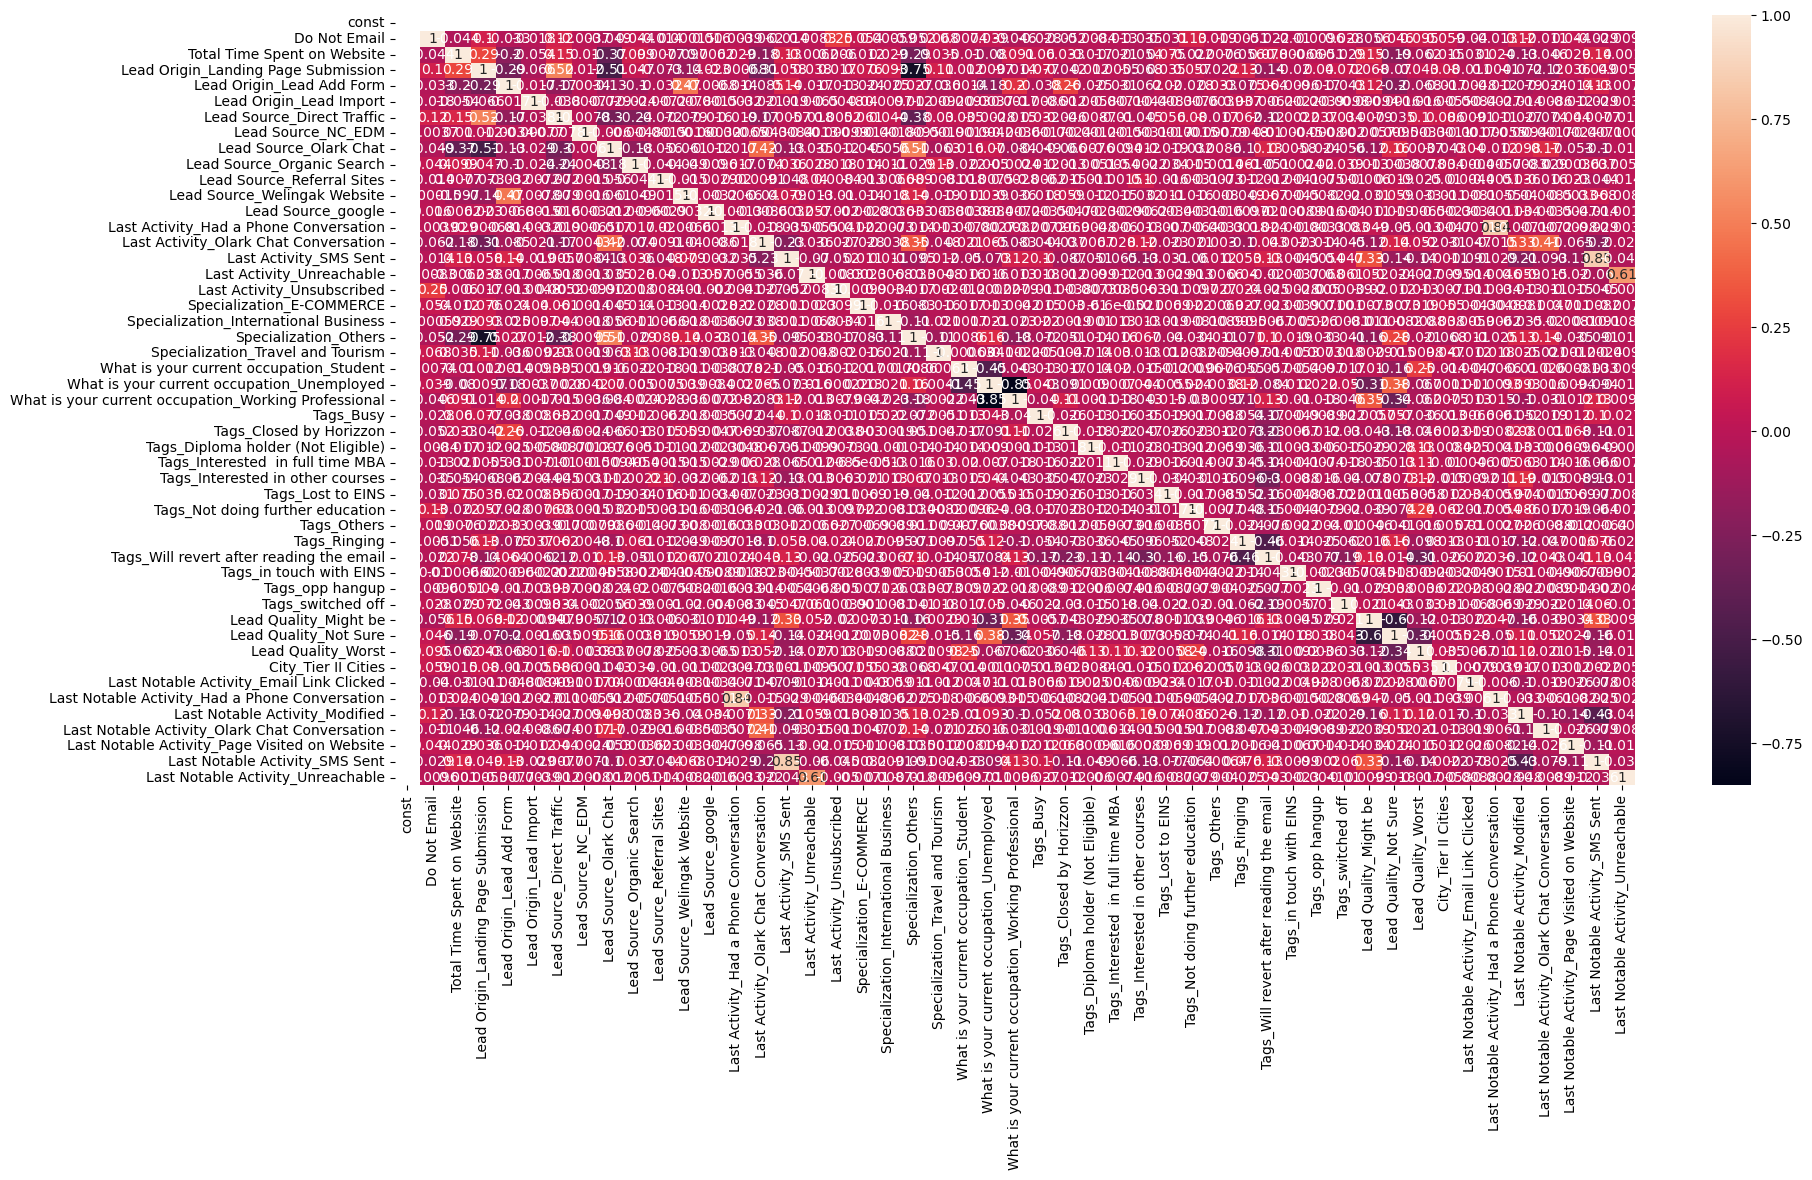

In [270]:
# To plot correlations
plt.figure(figsize = (20,10))  
sns.heatmap(X4.corr(),annot = True)

In [271]:
#From VIF values and heat maps, we can see that there is not much multicollinearity present. All variables have a good value of VIF. These features seem important from the business aspect as well.
#So we need not drop any more variables and we can proceed with making predictions using this model only.

In [272]:
# To get predicted values on train set
y_train_pred_final = get_pred(X4,logm4)
y_train_pred_final.head()

,Converted,Converted_prob,Lead ID,predicted
0,0,0.14,3009,0
1,0,0.06,1012,0
2,0,0.00,9226,0
3,1,0.92,4750,1
4,1,1.00,7987,1


In [273]:
# Confusion Matrix and accuracy
confusion = conf_mat(y_train_pred_final.Converted,y_train_pred_final.predicted)

Confusion Matrix:
[[3716  189]
 [ 279 2167]]
Training Accuracy:  0.9263108171941427


In [274]:

#This is our final model:

#All p-values are very close to zero.
#VIFs for all features are very low. There is hardly any multicollinearity present.
#Training accuracy of 91.95% at a probability threshold of 0.05 is also very good.



In [275]:
# To display features with corrsponding coefficients in final model
pd.options.display.float_format = '{:.2f}'.format
new_params = logm4.params[1:]
new_params

Do Not Email                                            -1.24
Total Time Spent on Website                              1.13
Lead Origin_Landing Page Submission                     -1.10
Lead Origin_Lead Add Form                                1.32
Lead Origin_Lead Import                                  0.96
Lead Source_Direct Traffic                              -0.18
Lead Source_NC_EDM                                      22.13
Lead Source_Olark Chat                                   0.82
Lead Source_Organic Search                              -0.09
Lead Source_Referral Sites                              -0.33
Lead Source_Welingak Website                             3.73
Lead Source_google                                     -19.30
Last Activity_Had a Phone Conversation                   2.77
Last Activity_Olark Chat Conversation                   -0.64
Last Activity_SMS Sent                                   0.98
Last Activity_Unreachable                                0.80
Last Act

In [276]:
# Relative feature importance
feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Do Not Email                                            -5.58
Total Time Spent on Website                              5.13
Lead Origin_Landing Page Submission                     -4.95
Lead Origin_Lead Add Form                                5.97
Lead Origin_Lead Import                                  4.33
Lead Source_Direct Traffic                              -0.80
Lead Source_NC_EDM                                     100.00
Lead Source_Olark Chat                                   3.71
Lead Source_Organic Search                              -0.40
Lead Source_Referral Sites                              -1.47
Lead Source_Welingak Website                            16.85
Lead Source_google                                     -87.19
Last Activity_Had a Phone Conversation                  12.52
Last Activity_Olark Chat Conversation                   -2.89
Last Activity_SMS Sent                                   4.42
Last Activity_Unreachable                                3.59
Last Act

In [277]:
# To sort features based on importance
sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx

Do Not Email                                            11
Total Time Spent on Website                             39
Lead Origin_Landing Page Submission                     38
Lead Origin_Lead Add Form                               22
Lead Origin_Lead Import                                 36
Lead Source_Direct Traffic                              21
Lead Source_NC_EDM                                      42
Lead Source_Olark Chat                                   0
Lead Source_Organic Search                              44
Lead Source_Referral Sites                              43
Lead Source_Welingak Website                             2
Lead Source_google                                      32
Last Activity_Had a Phone Conversation                  37
Last Activity_Olark Chat Conversation                   41
Last Activity_SMS Sent                                  23
Last Activity_Unreachable                               13
Last Activity_Unsubscribed                              

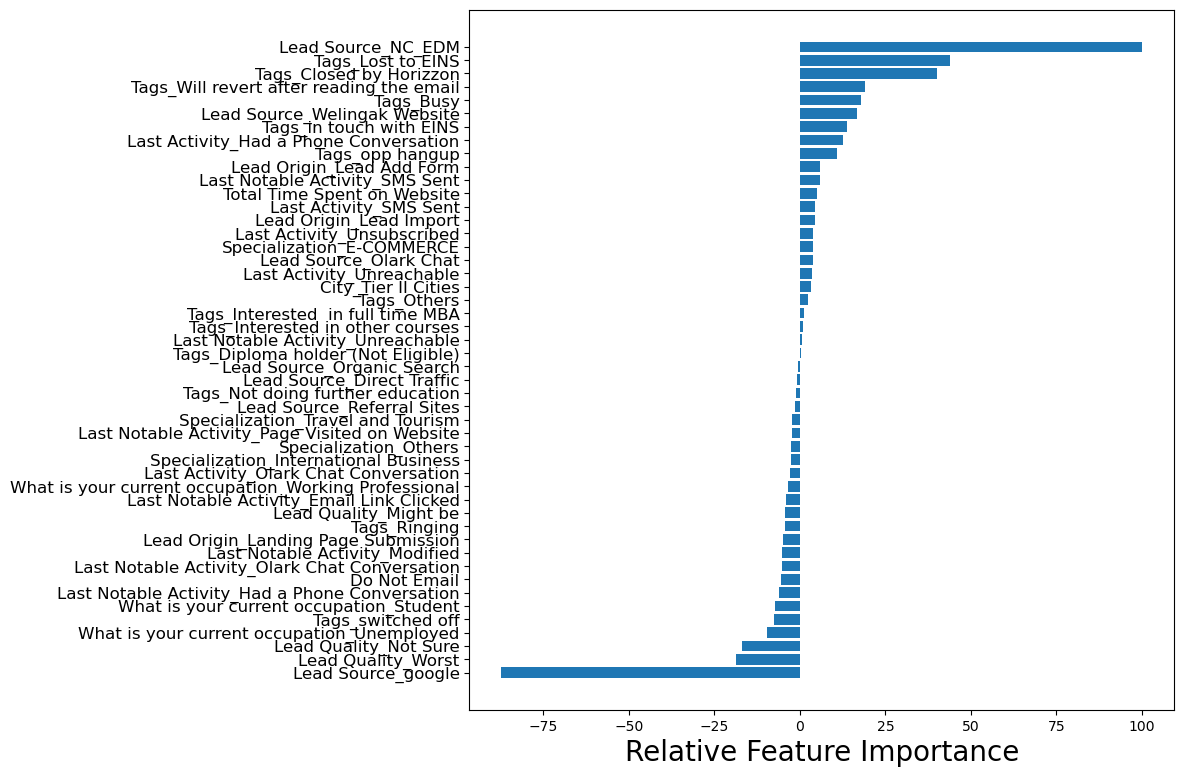

In [278]:
# To plot features with their relative importance
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(2, 2, 2)
pos = np.arange(sorted_idx.shape[0])
ax.barh(pos, feature_importance[sorted_idx])
ax.set_yticks(pos)
ax.set_yticklabels(np.array(X_train[col3].columns)[sorted_idx], fontsize=12)
ax.set_xlabel('Relative Feature Importance', fontsize=20) 
plt.show()

In [279]:
#Conclusion
#After trying out saveral models, our final model has following characteristics:

#All p-values are very close to zero.
#VIFs for all features are very low. There is hardly any multicollinearity present.
#The overall testing accuracy of 90.78% at a probability threshold of 0.05 is also very good.
#Dataset	Accuracy	Sensitivity	Specificity	False Positive Rate	Positive Predictive Value	Negative Predictive Value	AUC
#Train	0.9111	0.8573	0.9449	0.0550	0.9070	0.9135	0.9488
#Test	0.9078	0.8412	0.9457	0.0542	0.8984	0.9126	0.9388
#The optimal threshold for the model is 0.20 which is calculated based on tradeoff between sensitivity, specificity and accuracy. According to business needs, this threshold can be changed to increase or decrease a specific metric.

#High sensitivity ensures that most of the leads who are likely to convert are correctly predicted, while high specificity ensures that most of the leads who are not likely to convert are correctly predicted.

#Twelve features were selected as the most significant in predicting the conversion:

#Features having positive impact on conversion probability in decreasing order of impact:
#Features with Positive Coefficient Values
#Tags_Lost to EINS
#Tags_Closed by Horizzon
#Tags_Will revert after reading the email
#Tags_Busy
#Lead Source_Welingak Website
#Last Notable Activity_SMS Sent
#Lead Origin_Lead Add Form